## **BUSINESS UNDERSTANDING**

**Problem Statement:**

Company ABC, a major credit card company, faces challenges with their existing fraud detection system. The current system exhibits slow responsiveness in recognizing new patterns of fraud, leading to significant financial losses. To address this issue, they have contracted us to design and implement an algorithm that can efficiently identify and flag potentially fraudulent transactions for further investigation. The data provided consists of two tables: "cc_info," containing general credit card and cardholder information, and "transactions," containing details of credit card transactions that occurred between August 1st and October 30th.

**Objective:**

The primary goal of this project is to build an advanced fraud detection system using neural networks to identify transactions that appear unusual and potentially fraudulent. By applying object-oriented programming (OOPs) concepts, we aim to develop a scalable and modular solution that can handle large volumes of data and provide valuable insights to Company ABC.


**Data Dictionary for cc_info.csv**

| Column Name        | Data Type | Description                                       |
|--------------------|-----------|---------------------------------------------------|
| credit_card        | float     | Credit card number (masked for privacy)          |
| city               | object    | City where the credit card is registered         |
| state              | object    | State where the credit card is registered        |
| zipcode            | int       | Zip code of the credit card's billing address     |
| credit_card_limit  | int       | Credit card limit (maximum allowable amount)     |


**Data Dictionary for transactions.csv**


| Column Name                | Data Type | Description                                              |
|---------------------------|-----------|----------------------------------------------------------|
| credit_card                | float     | Credit card number (masked for privacy)                 |
| date                       | object    | Date and time of the transaction                        |
| transaction_dollar_amount  | float     | Dollar amount of the transaction                        |
| Long                       | float     | Longitude of the location where the transaction was made|
| Lat                        | float     | Latitude of the location where the transaction was made |


Data was sourced from Kaggle : https://www.kaggle.com/datasets/iabhishekofficial/creditcard-fraud-detection


### **Null and Alternate Understanding:**

**Hypothesis 1: Transaction Volume and Credit Card Limit Correlation**

- Null Hypothesis (H0): There is no correlation between credit card limits and transaction volumes.

- Alternative Hypothesis (H1): Credit card limits and transaction volumes are positively correlated.

**Hypothesis 2: Seasonal Spending Variation**

- Null Hypothesis (H0): There is no significant seasonal variation in transaction dollar amounts.

- Alternative Hypothesis (H1): Transaction dollar amounts exhibit seasonal variation over time.

**Hypothesis 3: Geographic Spending Patterns**

- Null Hypothesis (H0): There is no difference in transaction dollar amounts based on geographic locations (latitude and longitude).

- Alternative Hypothesis (H1): Transaction dollar amounts vary significantly based on geographic locations.

### **Research Questions:**

#### **Transaction Analysis:**

1. What are the top 10 cities with the highest total transaction dollar amount?

2. What is the total transaction dollar amount for each month in the dataset?

3. What is the average transaction dollar amount for each city?

4. What is the average transaction dollar amount for each state?

5. How many transactions were made in each city?

6. Is there any seasonal pattern in transaction volumes or dollar amounts?
7. What is the geographical distribution of transactions based on latitude and longitude?
8. Which day of the week has the highest transaction volume?

#### **Credit Card Analysis:**
1. Which state has the highest average credit card limit?
2. What are the top 5 credit cards with the highest total transaction dollar amounts?
3. What is the average credit card limit for each state?
4. Is there any correlation between credit card limits and transaction dollar amounts? If yes, what is the correlation coefficient?
5. What is the total transaction dollar amount for each credit card?
6. Which credit card has the highest average transaction dollar amount?
7. What is the average credit card limit across all credit cards in the dataset?
8. Is there any relationship between credit card limits and transaction dollar amounts?
9. How many unique credit cards are present in the dataset?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !pip install -q <lib_001> <lib_002> ...
!pip install imbalanced-learn

!pip install kaggle


In [ ]:
# Data handling
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import skew, kurtosis

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.plotting import scatter_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Imbalanced data handling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, \
    precision_score, recall_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Anomaly detection models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

import hashlib


In [ ]:
import os

# Set the environment variables with your Kaggle credentials
os.environ['KAGGLE_USERNAME'] = "aliduabubakari"
os.environ['KAGGLE_KEY'] = "e0955cb855d1405ece24ae80c7914d57"


In [ ]:
import os

# Replace the folder path with your desired target folder
target_folder = "/content/drive/MyDrive/Colab Notebooks/Anomaly Detection"
os.makedirs(target_folder, exist_ok=True)


In [ ]:
# Replace 'creditcard-fraud-detection' with the actual dataset name
!kaggle datasets download -d iabhishekofficial/creditcard-fraud-detection -p "{target_folder}"


creditcard-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

# List the downloaded files in the target folder
downloaded_files = os.listdir(target_folder)

# Find the name of the downloaded zip file
zip_file_name = [file for file in downloaded_files if file.endswith('.zip')][0]

# Unzip the downloaded zip file in the target folder
with zipfile.ZipFile(os.path.join(target_folder, zip_file_name), "r") as zip_ref:
    zip_ref.extractall(target_folder)


In [ ]:
import os

# List the files in the target folder to verify the extracted files
os.listdir(target_folder)

['creditcard-fraud-detection.zip',
 'credit-card-fraud-detection.ipynb',
 'kaggle.json',
 'content',
 'cc_info.csv',
 'transactions.csv',
 'CreditCardAnomalyDectection-EDA.ipynb']

In [ ]:
# Construct the full file paths
cc_info_path = os.path.join(target_folder, "cc_info.csv")
transactions_path = os.path.join(target_folder, "transactions.csv")

# Read the CSV files
df_cc_info = pd.read_csv(cc_info_path)
df_transactions = pd.read_csv(transactions_path)


In [ ]:
df_cc_info.head()

credit_card      city state  zipcode  credit_card_limit
0  1280981422329509    Dallas    PA    18612               6000
1  9737219864179988   Houston    PA    15342              16000
2  4749889059323202    Auburn    MA     1501              14000
3  9591503562024072   Orlando    WV    26412              18000
4  2095640259001271  New York    NY    10001              20000

In [ ]:
df_cc_info['credit_card'].head()

0    1280981422329509
1    9737219864179988
2    4749889059323202
3    9591503562024072
4    2095640259001271
Name: credit_card, dtype: int64

In [ ]:
#check shape of data
df_cc_info.shape

(984, 5)

In [ ]:
df_cc_info.columns.tolist()

['credit_card', 'city', 'state', 'zipcode', 'credit_card_limit']

In [ ]:
df_cc_info.dtypes

credit_card           int64
city                 object
state                object
zipcode               int64
credit_card_limit     int64
dtype: object

In [ ]:
# Check for missing values in the credit card info DataFrame
df_cc_info.isna().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [ ]:
#check for duplicates (credit card info)
df_cc_info.duplicated().sum()

0

In [ ]:
df_transactions.head()

credit_card                 date  transaction_dollar_amount  \
0  1003715054175576  2015-09-11 00:32:40                      43.78   
1  1003715054175576  2015-10-24 22:23:08                     103.15   
2  1003715054175576  2015-10-26 18:19:36                      48.55   
3  1003715054175576  2015-10-22 19:41:10                     136.18   
4  1003715054175576  2015-10-26 20:08:22                      71.82   

        Long        Lat  
0 -80.174132  40.267370  
1 -80.194240  40.180114  
2 -80.211033  40.313004  
3 -80.174138  40.290895  
4 -80.238720  40.166719

In [ ]:
# Convert the 'date' column to datetime data type
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [ ]:
df_transactions['date'].head()

0   2015-09-11 00:32:40
1   2015-10-24 22:23:08
2   2015-10-26 18:19:36
3   2015-10-22 19:41:10
4   2015-10-26 20:08:22
Name: date, dtype: datetime64[ns]

In [ ]:
#check shape of data
df_transactions.shape

(294588, 5)

In [ ]:
df_transactions.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat'], dtype='object')

In [ ]:
df_transactions.dtypes

credit_card                           int64
date                         datetime64[ns]
transaction_dollar_amount           float64
Long                                float64
Lat                                 float64
dtype: object

In [ ]:
# Check for missing values in the credit card info DataFrame
df_transactions.isna().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [ ]:
#check for duplicates (credit card info)
df_transactions.duplicated().sum()

0

## Merge the datasets

In [ ]:
import pandas as pd

# Assuming you have already read the two datasets as df_cc_info and df_transactions

# Perform a left join on the 'credit_card' column
merged_df = pd.merge(df_transactions, df_cc_info, on='credit_card', how='left')

# Display the first few rows of the merged DataFrame to verify the result
merged_df.head()


credit_card                date  transaction_dollar_amount       Long  \
0  1003715054175576 2015-09-11 00:32:40                      43.78 -80.174132   
1  1003715054175576 2015-10-24 22:23:08                     103.15 -80.194240   
2  1003715054175576 2015-10-26 18:19:36                      48.55 -80.211033   
3  1003715054175576 2015-10-22 19:41:10                     136.18 -80.174138   
4  1003715054175576 2015-10-26 20:08:22                      71.82 -80.238720   

         Lat     city state  zipcode  credit_card_limit  
0  40.267370  Houston    PA    15342              20000  
1  40.180114  Houston    PA    15342              20000  
2  40.313004  Houston    PA    15342              20000  
3  40.290895  Houston    PA    15342              20000  
4  40.166719  Houston    PA    15342              20000

In [ ]:
# Check for missing values in the credit card info DataFrame
merged_df.isna().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

In [ ]:
#check shape of data
merged_df.shape

(294588, 9)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   city                       294588 non-null  object        
 6   state                      294588 non-null  object        
 7   zipcode                    294588 non-null  int64         
 8   credit_card_limit          294588 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 22.5+ MB


In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
def hash_credit_card(credit_card_number, hash_length=8):
    # Convert the credit card number to bytes (hashlib works with bytes)
    credit_card_bytes = str(credit_card_number).encode('utf-8')

    # Create a SHA-256 hash object
    hash_object = hashlib.sha256(credit_card_bytes)

    # Get the hexadecimal representation of the hash and truncate to the desired length
    hashed_credit_card = hash_object.hexdigest()[:hash_length]

    return hashed_credit_card

In [ ]:
# Apply the hash_credit_card function to the 'credit_card' column
merged_df['hashed_credit_card'] = merged_df['credit_card'].apply(hash_credit_card)

# drop the date column from the data set
merged_df.drop(columns="credit_card", inplace=True)

In [ ]:
# Display the updated DataFrame with the hashed credit card numbers
merged_df.head()

date  transaction_dollar_amount       Long        Lat  \
0 2015-09-11 00:32:40                      43.78 -80.174132  40.267370   
1 2015-10-24 22:23:08                     103.15 -80.194240  40.180114   
2 2015-10-26 18:19:36                      48.55 -80.211033  40.313004   
3 2015-10-22 19:41:10                     136.18 -80.174138  40.290895   
4 2015-10-26 20:08:22                      71.82 -80.238720  40.166719   

      city state  zipcode  credit_card_limit hashed_credit_card  
0  Houston    PA    15342              20000           02e58935  
1  Houston    PA    15342              20000           02e58935  
2  Houston    PA    15342              20000           02e58935  
3  Houston    PA    15342              20000           02e58935  
4  Houston    PA    15342              20000           02e58935

In [ ]:
merged_df.describe().T

count          mean           std          min  \
transaction_dollar_amount  294588.0     86.008036    124.655954     0.010000   
Long                       294588.0    -76.235238     20.135015  -179.392887   
Lat                        294588.0     40.937669      5.391695   -68.046553   
zipcode                    294588.0  18073.772516  23945.510551   690.000000   
credit_card_limit          294588.0  15502.053716   7956.291556  2000.000000   

                                    25%           50%           75%  \
transaction_dollar_amount     29.970000     58.470000    100.400000   
Long                         -80.209708    -73.199737    -72.091933   
Lat                           40.487726     42.403066     43.180015   
zipcode                     3280.000000   5820.000000  18612.000000   
credit_card_limit          10000.000000  15000.000000  20000.000000   

                                    max  
transaction_dollar_amount    999.970000  
Long                         179.917513  
Lat                           78.914330  
zipcode                    98401.000000  
credit_card_limit          55000.000000

## **UNIVARIATE ANALYSIS**

##### transaction_dollar_amount

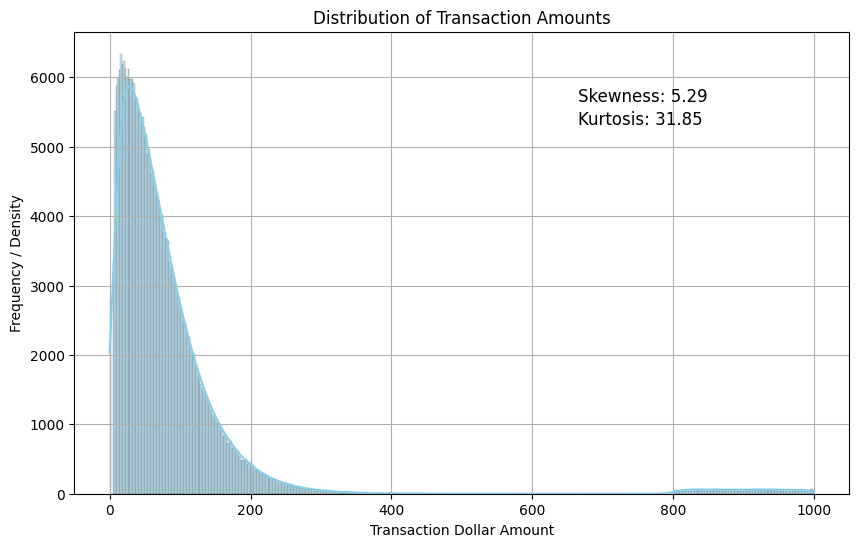

In [ ]:

# Create a combined histogram and KDE plot using displot
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['transaction_dollar_amount'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Frequency / Density')
plt.title('Distribution of Transaction Amounts')
plt.grid(True)

# Calculate skewness and kurtosis
data_skewness = skew(merged_df['transaction_dollar_amount'])
data_kurtosis = kurtosis(merged_df['transaction_dollar_amount'])

# Display skewness and kurtosis as text annotations on the plot
plt.text(0.65, 0.85, f"Skewness: {data_skewness:.2f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.65, 0.80, f"Kurtosis: {data_kurtosis:.2f}", transform=plt.gca().transAxes, fontsize=12)

plt.show()


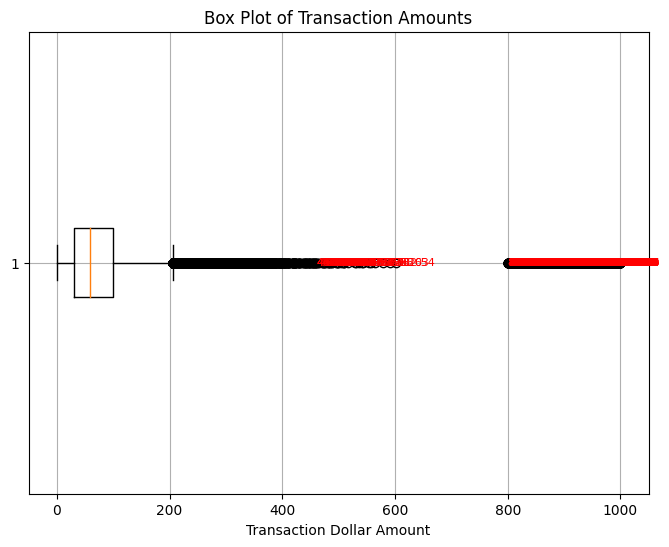

In [ ]:
# Calculate Z-scores for 'transaction_dollar_amount'
z_scores = (merged_df['transaction_dollar_amount'] - merged_df['transaction_dollar_amount'].mean()) / merged_df['transaction_dollar_amount'].std()

# Set the threshold for outliers (e.g., 3.0)
outlier_threshold = 3.0

# Identify outliers using the Z-score method
outliers = merged_df[abs(z_scores) > outlier_threshold]

# Create a box plot for transaction_dollar_amount
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['transaction_dollar_amount'], vert=False)
plt.xlabel('Transaction Dollar Amount')
plt.title('Box Plot of Transaction Amounts')
plt.grid(True)

# Display the outlier values
if not outliers.empty:
    outlier_values = outliers['transaction_dollar_amount'].values
    for outlier_value in outlier_values:
        plt.text(outlier_value, 1, f"{outlier_value:.2f}", color='red', fontsize=8, verticalalignment='center')

plt.show()


longitude and latitude values

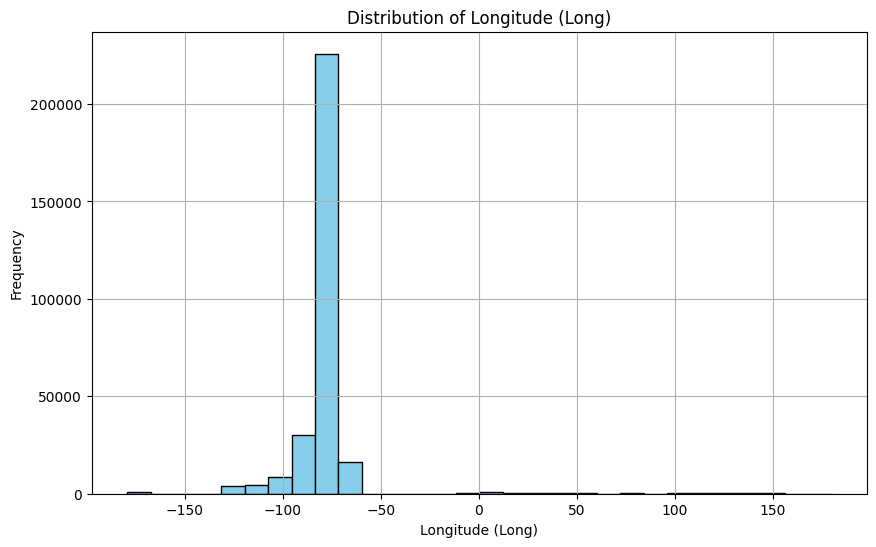

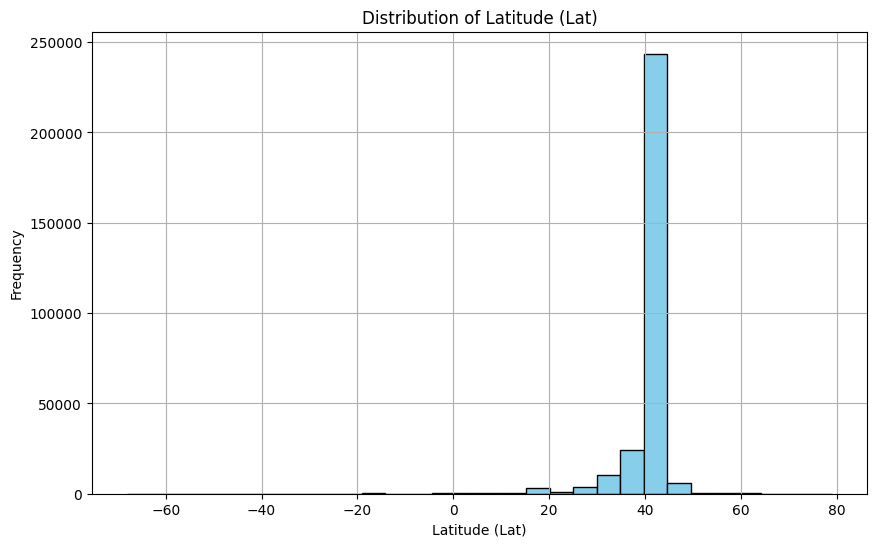

In [ ]:
# Create a histogram for longitude (Long)
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Long'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Longitude (Long)')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude (Long)')
plt.grid(True)
plt.show()

# Create a histogram for latitude (Lat)
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Lat'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Latitude (Lat)')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude (Lat)')
plt.grid(True)
plt.show()


In [ ]:
!pip install geopandas


<Figure size 1000x800 with 0 Axes>

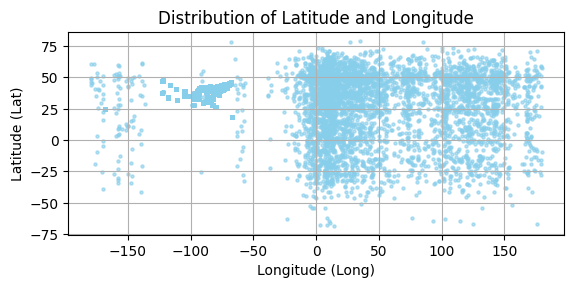

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have already read the 'merged_df' DataFrame

# Create a GeoDataFrame from the 'Lat' and 'Long' columns in 'merged_df'
geometry = gpd.points_from_xy(merged_df['Long'], merged_df['Lat'])
gdf = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Plot the distribution of points on a map
plt.figure(figsize=(10, 8))
gdf.plot(marker='o', color='skyblue', markersize=5, alpha=0.6)
plt.xlabel('Longitude (Long)')
plt.ylabel('Latitude (Lat)')
plt.title('Distribution of Latitude and Longitude')
plt.grid(True)
plt.show()


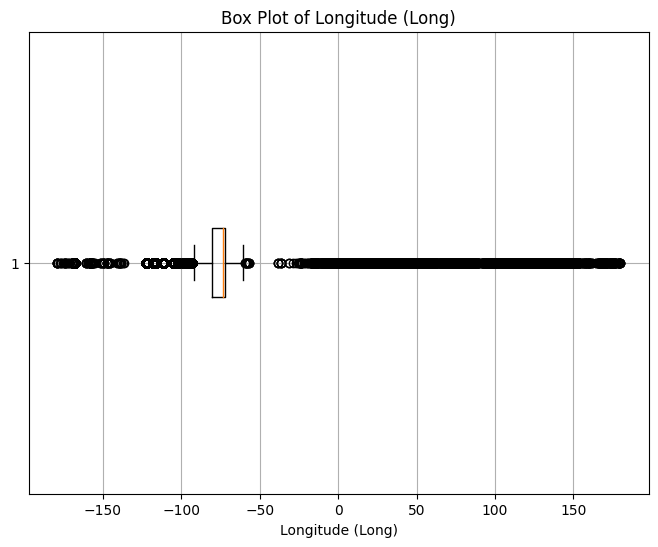

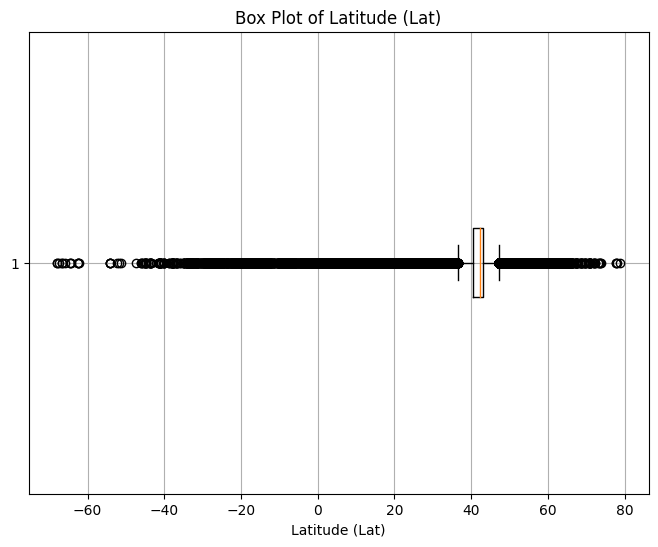

In [ ]:
# Create a box plot for Longitude (Long)
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['Long'], vert=False)
plt.xlabel('Longitude (Long)')
plt.title('Box Plot of Longitude (Long)')
plt.grid(True)
plt.show()

# Create a box plot for Latitude (Lat)
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['Lat'], vert=False)
plt.xlabel('Latitude (Lat)')
plt.title('Box Plot of Latitude (Lat)')
plt.grid(True)
plt.show()


<Figure size 1000x800 with 0 Axes>

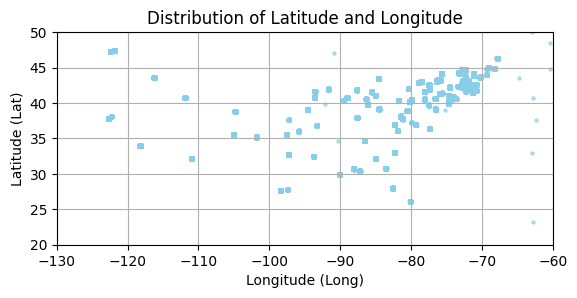

In [ ]:
# Plot the distribution of points on a map
plt.figure(figsize=(10, 8))
gdf.plot(marker='o', color='skyblue', markersize=5, alpha=0.6)

# Set limits for the x and y axes to zoom in on potential outliers
# You can adjust these limits based on the range of your data
plt.xlim([-130, -60])   # Example limits for longitude
plt.ylim([20, 50])      # Example limits for latitude

plt.xlabel('Longitude (Long)')
plt.ylabel('Latitude (Lat)')
plt.title('Distribution of Latitude and Longitude')
plt.grid(True)
plt.show()


city and state

In [ ]:
# Count the occurrences of each unique zip code
city_counts = merged_df['city'].value_counts()
city_counts

Washington    112693
Houston        21389
New York       15599
El Paso        12580
Dallas         10713
               ...  
Detroit           38
Vallejo           36
Baltimore         24
Roanoke           12
Bristol            5
Name: city, Length: 124, dtype: int64

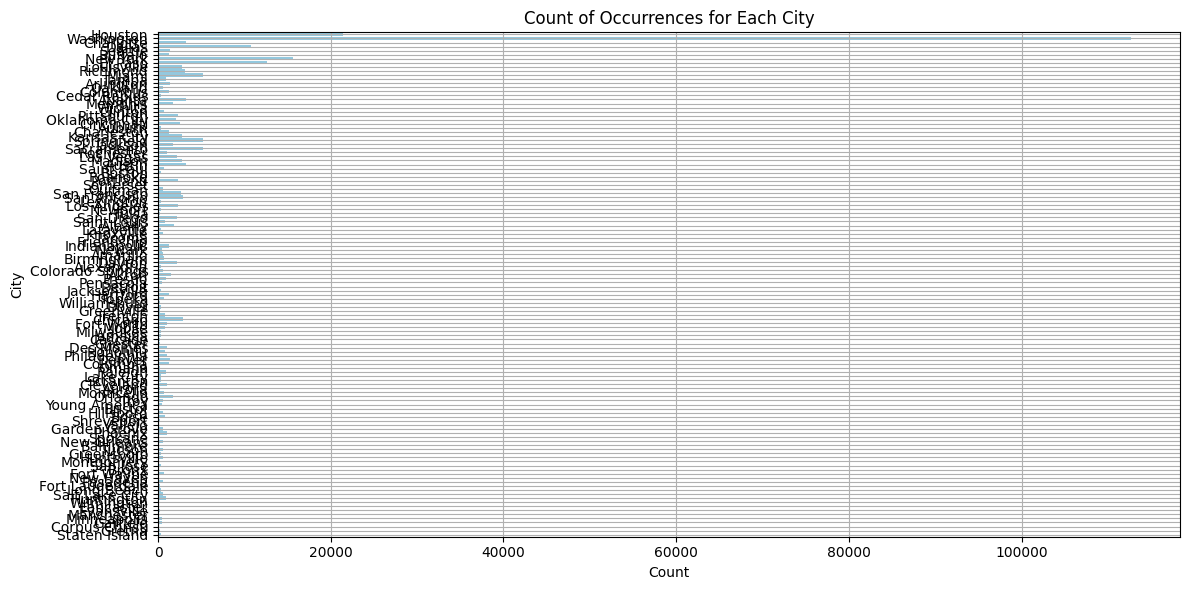

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the 'merged_df' DataFrame

# Create a horizontal count plot for unique cities
plt.figure(figsize=(12, 6), dpi=100)  # Increase the DPI value to improve resolution
sns.countplot(y='city', data=merged_df, color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count of Occurrences for Each City')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


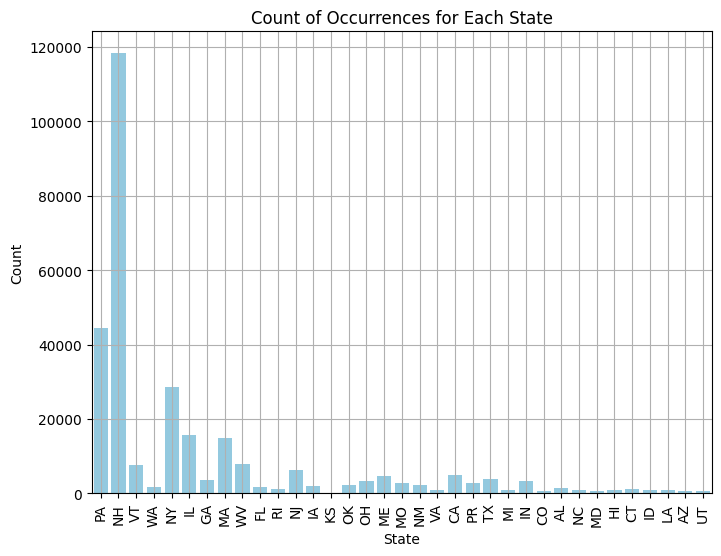

In [ ]:
# Create a count plot for unique states
plt.figure(figsize=(8, 6))
sns.countplot(x='state', data=merged_df, color='skyblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Occurrences for Each State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


zipcode

In [ ]:
# Count the occurrences of each unique zip code
zip_code_counts = merged_df['zipcode'].value_counts()
zip_code_counts

3280     112693
15342     21389
10001     15599
61738     12580
18612     10713
          ...  
4929         38
94589        36
21201        24
24001        12
2809          5
Name: zipcode, Length: 124, dtype: int64

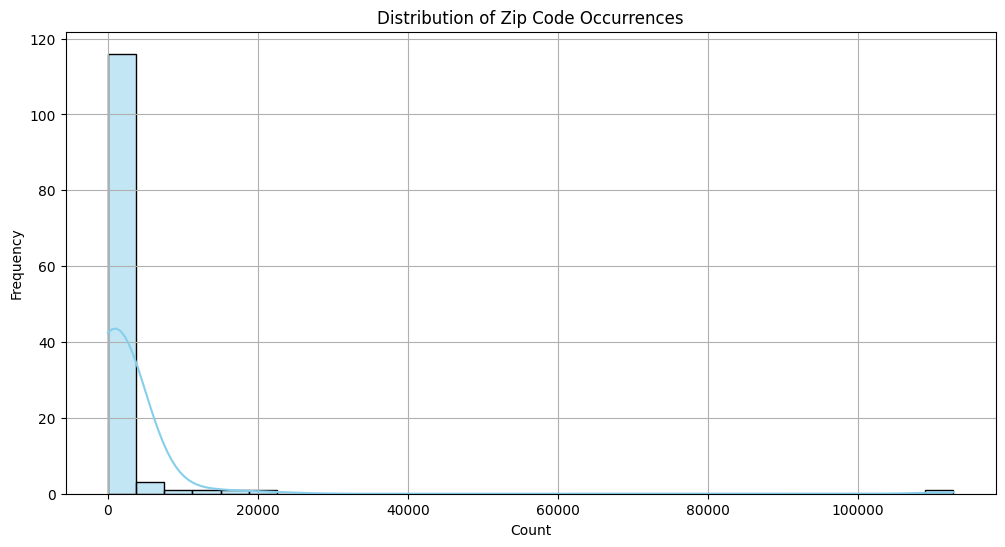

In [ ]:
# Assuming you have already read the 'merged_df' DataFrame

# Count the occurrences of each unique zip code
zip_code_counts = merged_df['zipcode'].value_counts()

# Create a histogram for zip code occurrences
plt.figure(figsize=(12, 6))
sns.histplot(zip_code_counts, bins=30, color='skyblue', kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Zip Code Occurrences')
plt.grid(True)
plt.show()


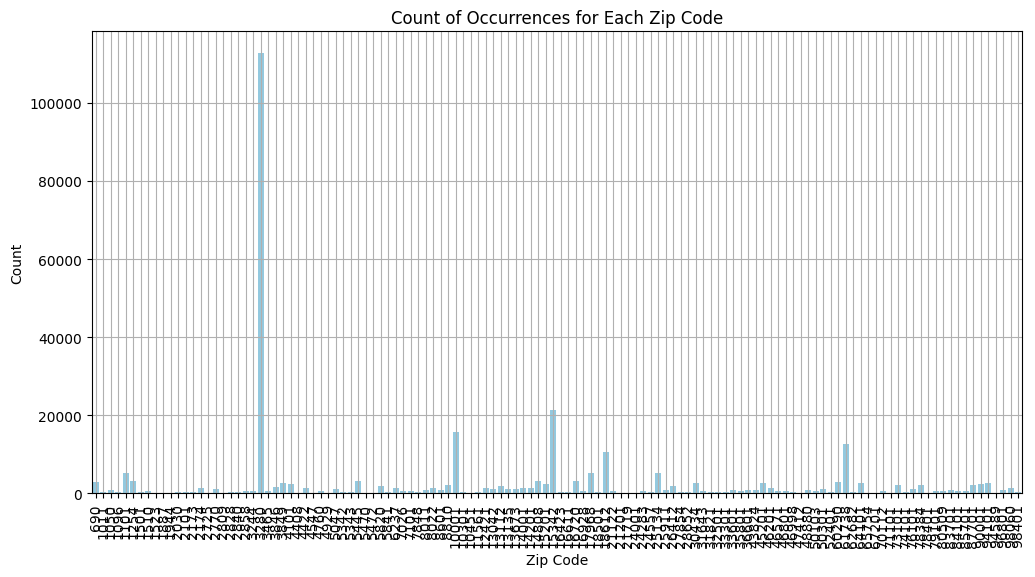

In [ ]:
# Assuming you have already read the 'merged_df' DataFrame

# Count the occurrences of each unique zip code
zip_code_counts = merged_df['zipcode'].value_counts()

# Create a bar plot for zip code occurrences
plt.figure(figsize=(12, 6))
sns.barplot(x=zip_code_counts.index, y=zip_code_counts.values, color='skyblue')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Count of Occurrences for Each Zip Code')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

credit_card_limit

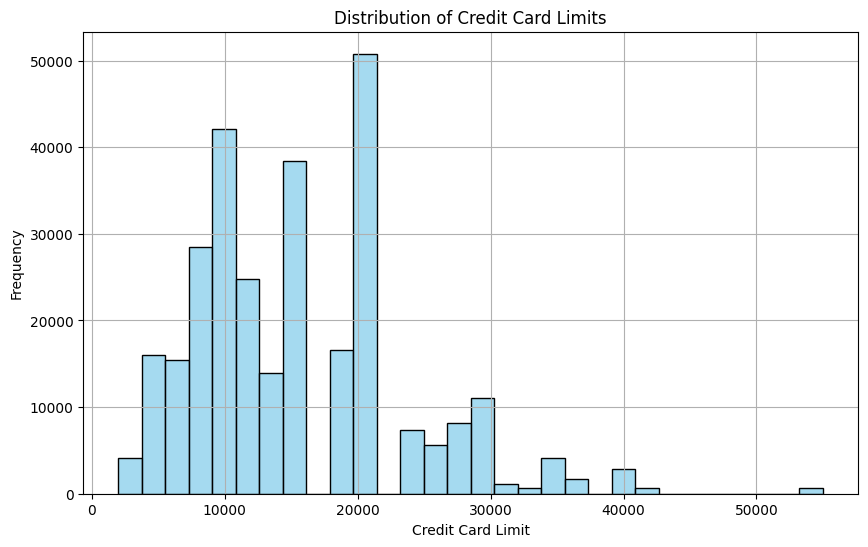

In [ ]:
# Create a histogram for credit card limits
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['credit_card_limit'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Credit Card Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Limits')
plt.grid(True)
plt.show()

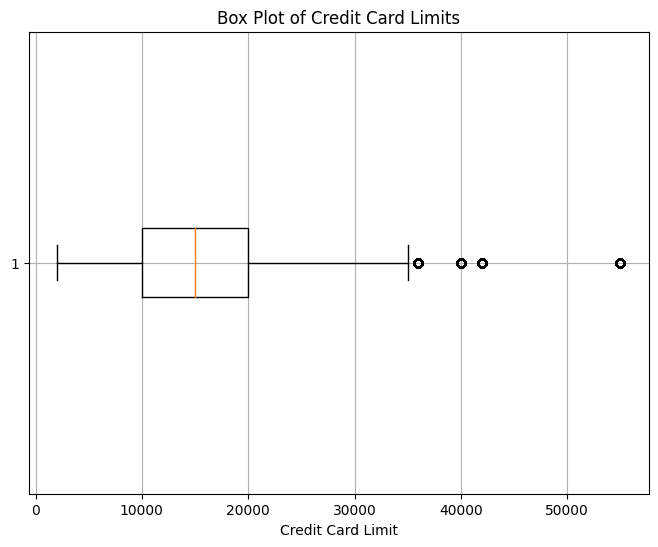

In [ ]:
# Check for outliers or extreme values using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['credit_card_limit'], vert=False)
plt.xlabel('Credit Card Limit')
plt.title('Box Plot of Credit Card Limits')
plt.grid(True)
plt.show()

In [ ]:
# Extract the year, month, and day from the 'date' column
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day

# Extract the week of the year and day of the week (Monday=0, Sunday=6)
merged_df['week_of_year'] = merged_df['date'].dt.isocalendar().week
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek

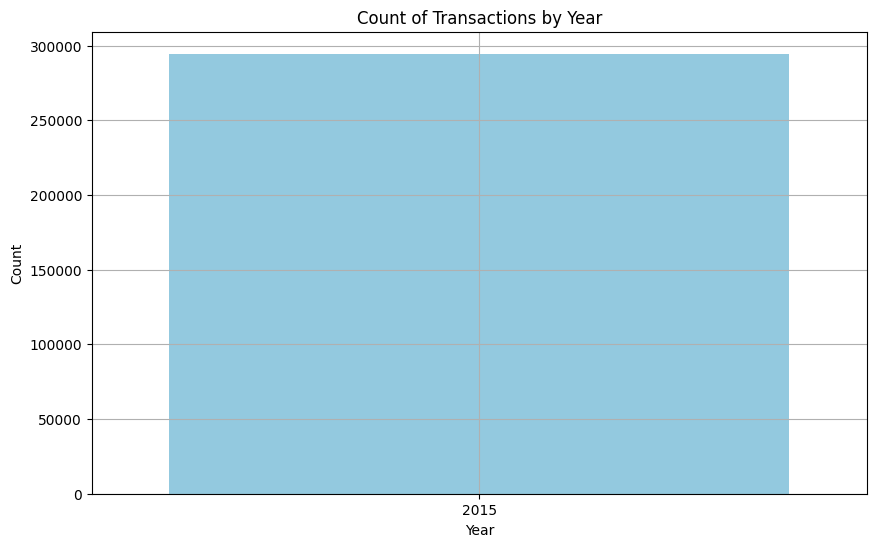

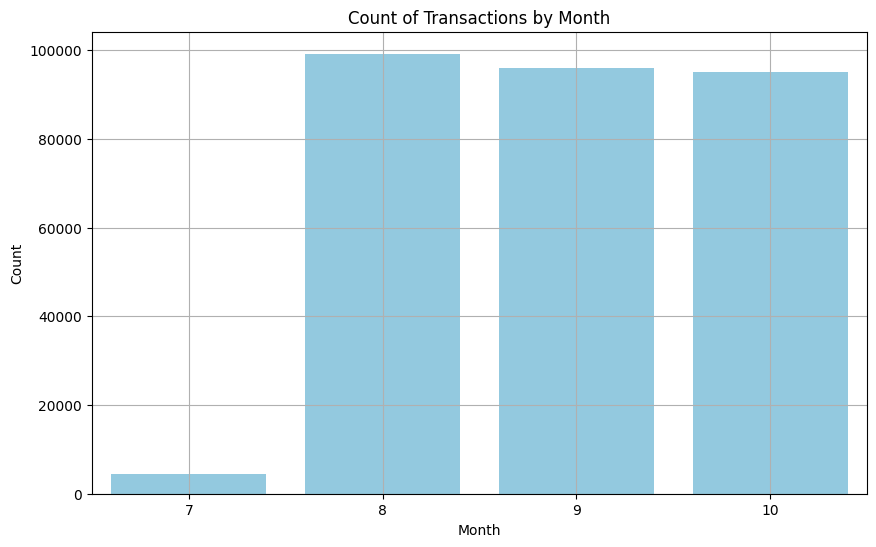

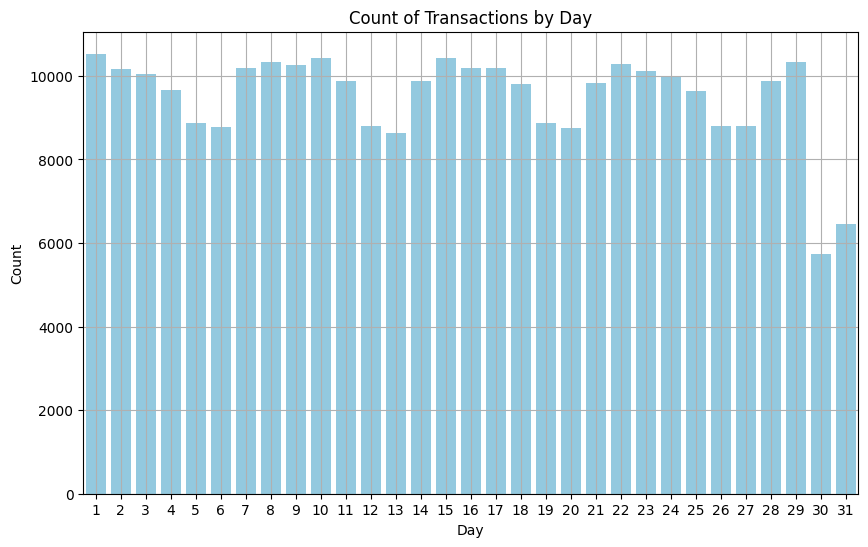

In [ ]:
# Assuming you have already extracted year, month, and day from the 'date' column

# Create countplot for transactions by year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=merged_df, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Transactions by Year')
plt.grid(True)
plt.show()

# Create countplot for transactions by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=merged_df, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Transactions by Month')
plt.grid(True)
plt.show()

# Create countplot for transactions by day
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=merged_df, color='skyblue')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Transactions by Day')
plt.grid(True)
plt.show()


## **BIVARIATE ANALYSIS**

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       294588 non-null  datetime64[ns]
 1   transaction_dollar_amount  294588 non-null  float64       
 2   Long                       294588 non-null  float64       
 3   Lat                        294588 non-null  float64       
 4   city                       294588 non-null  object        
 5   state                      294588 non-null  object        
 6   zipcode                    294588 non-null  int64         
 7   credit_card_limit          294588 non-null  int64         
 8   hashed_credit_card         294588 non-null  object        
 9   year                       294588 non-null  int64         
 10  month                      294588 non-null  int64         
 11  day                        294588 non-null  int64   

Transaction Dollar Amount vs. Credit Card Limit

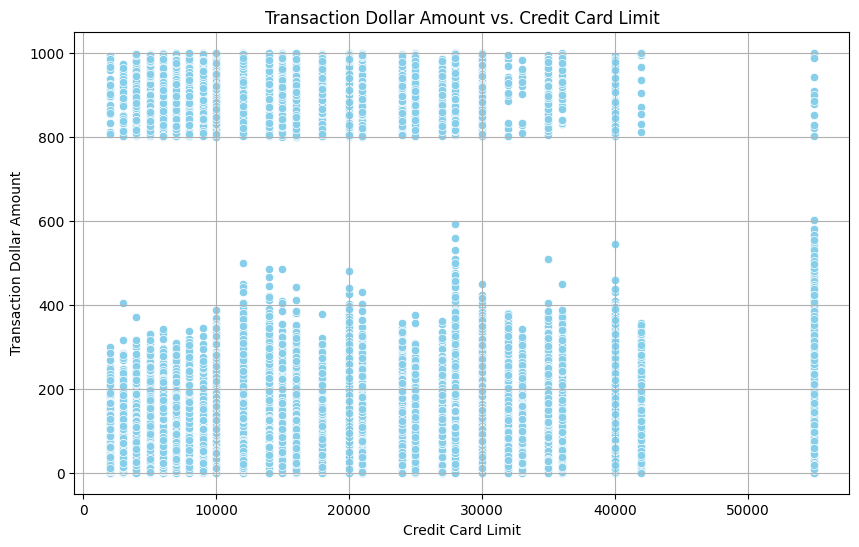

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_card_limit', y='transaction_dollar_amount', data=merged_df, color='skyblue')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount vs. Credit Card Limit')
plt.grid(True)
plt.show()


The scatterplot shows the relationship between credit card limit and transaction dollar amount. There is a positive correlation between the two variables, which means that as credit card limit increases, so does transaction dollar amount. However, the correlation is not perfect, as there are some outliers.

The outliers in the scatterplot could be due to a number of factors, such as:

Customers with high credit limits who make large transactions infrequently.
Customers with low credit limits who make small transactions frequently.
Customers who have recently been approved for a credit card with a high limit and are still spending within their old limit.

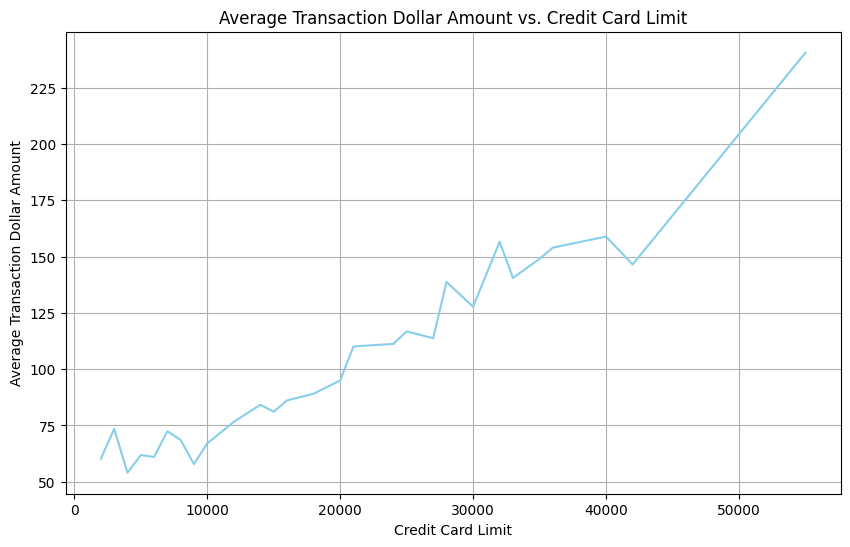

In [ ]:
# Calculate average or median transaction dollar amount for each credit card limit
average_transaction_amount = merged_df.groupby('credit_card_limit')['transaction_dollar_amount'].mean()
# For median, use: median_transaction_amount = merged_df.groupby('credit_card_limit')['transaction_dollar_amount'].median()

# Create a line plot or bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_transaction_amount.index, y=average_transaction_amount.values, color='skyblue')
# For bar plot, use: sns.barplot(x=average_transaction_amount.index, y=average_transaction_amount.values, color='skyblue')
plt.xlabel('Credit Card Limit')
plt.ylabel('Average Transaction Dollar Amount')
plt.title('Average Transaction Dollar Amount vs. Credit Card Limit')
plt.grid(True)
plt.show()

2.	Transaction Dollar Amount vs. Latitude/Longitude

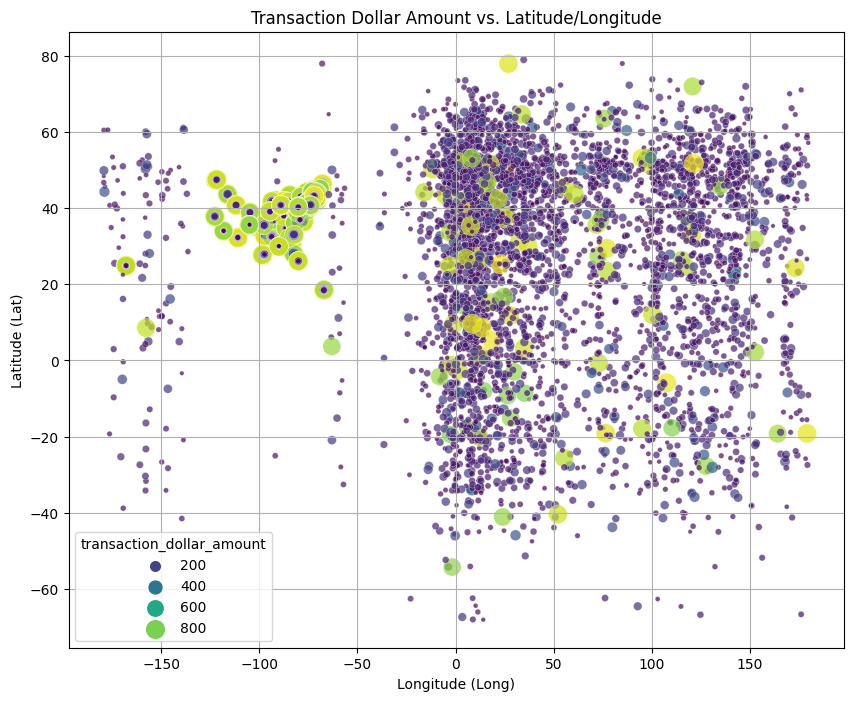

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Long', y='Lat', hue='transaction_dollar_amount', data=gdf, palette='viridis', size='transaction_dollar_amount', sizes=(10, 200), alpha=0.7)
plt.xlabel('Longitude (Long)')
plt.ylabel('Latitude (Lat)')
plt.title('Transaction Dollar Amount vs. Latitude/Longitude')
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter_mapbox(gdf, lat='Lat', lon='Long', color='transaction_dollar_amount', size='transaction_dollar_amount',
                        size_max=20, zoom=4, hover_name='transaction_dollar_amount')
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Transaction Dollar Amount vs. Latitude/Longitude')
fig.show()


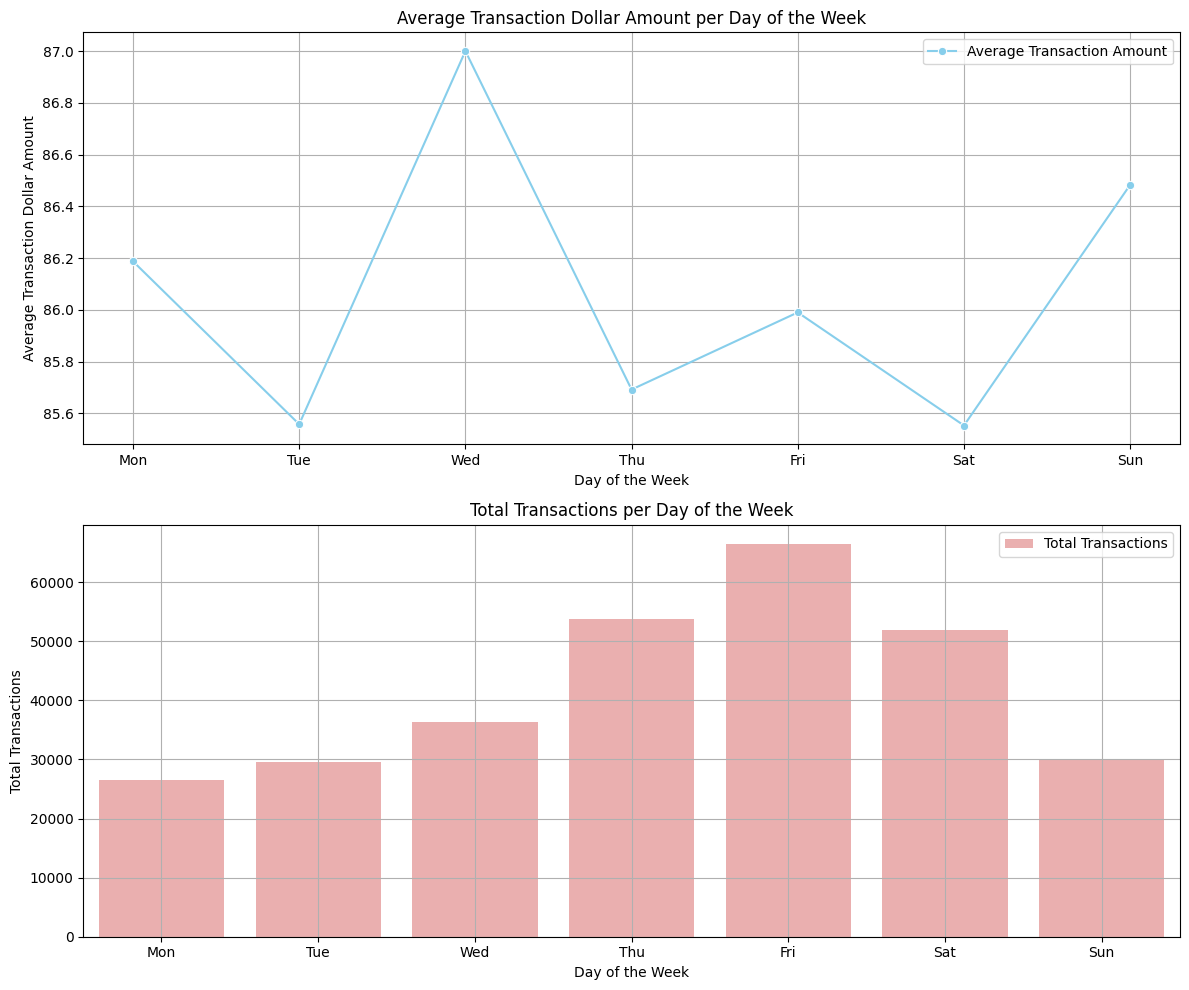

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average transaction dollar amount for each day of the week
average_transaction_amount_per_day = merged_df.groupby('day_of_week')['transaction_dollar_amount'].mean()

# Calculate total transactions for each day of the week
total_transactions_per_day = merged_df['day_of_week'].value_counts()

# Create a figure with two subplots (line plot and bar plot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Line plot for average transaction dollar amount
sns.lineplot(x=average_transaction_amount_per_day.index, y=average_transaction_amount_per_day.values, marker='o', color='skyblue', label='Average Transaction Amount', ax=ax1)

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Average Transaction Dollar Amount')
ax1.set_title('Average Transaction Dollar Amount per Day of the Week')
ax1.set_xticks(range(7))
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Customize x-axis labels
ax1.grid(True)
ax1.legend()

# Bar plot for total transactions
sns.barplot(x=total_transactions_per_day.index, y=total_transactions_per_day.values, color='lightcoral', alpha=0.7, label='Total Transactions', ax=ax2)

ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Total Transactions')
ax2.set_title('Total Transactions per Day of the Week')
ax2.set_xticks(range(7))
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Customize x-axis labels
ax2.grid(True)
ax2.legend()

# Adjust spacing between the two plots
plt.tight_layout()

plt.show()


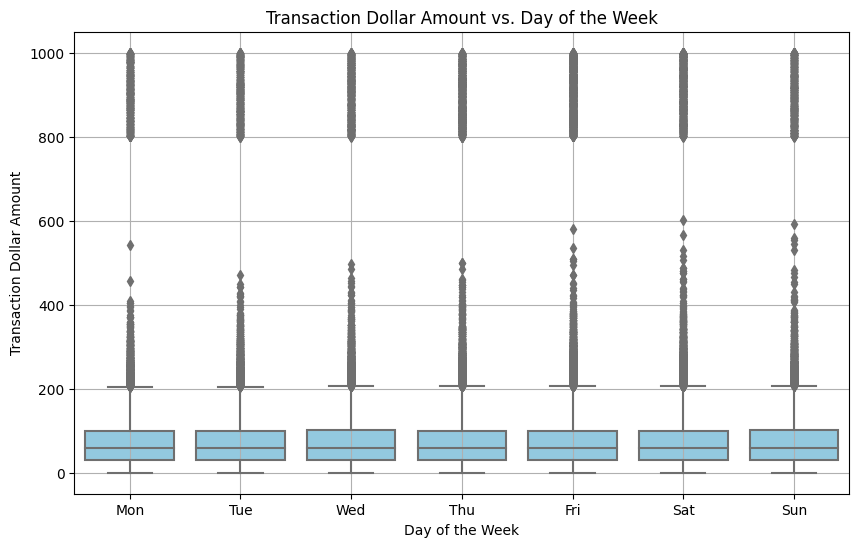

In [ ]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='transaction_dollar_amount', data=merged_df, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount vs. Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Customize x-axis labels
plt.grid(True)
plt.show()


Transaction Dollar Amount vs. City:

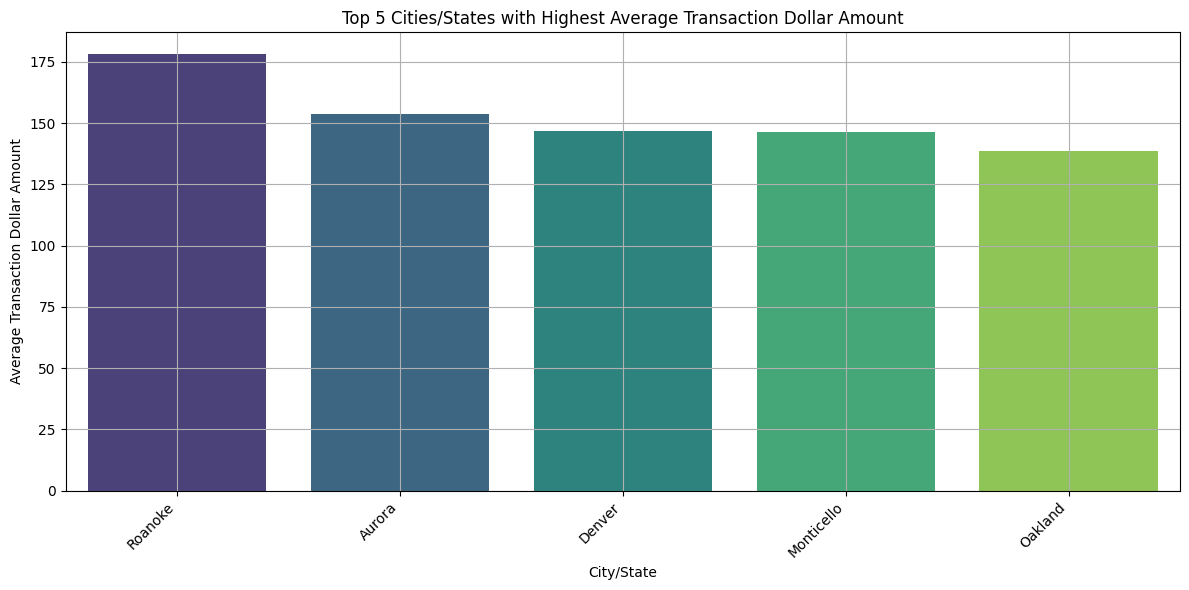

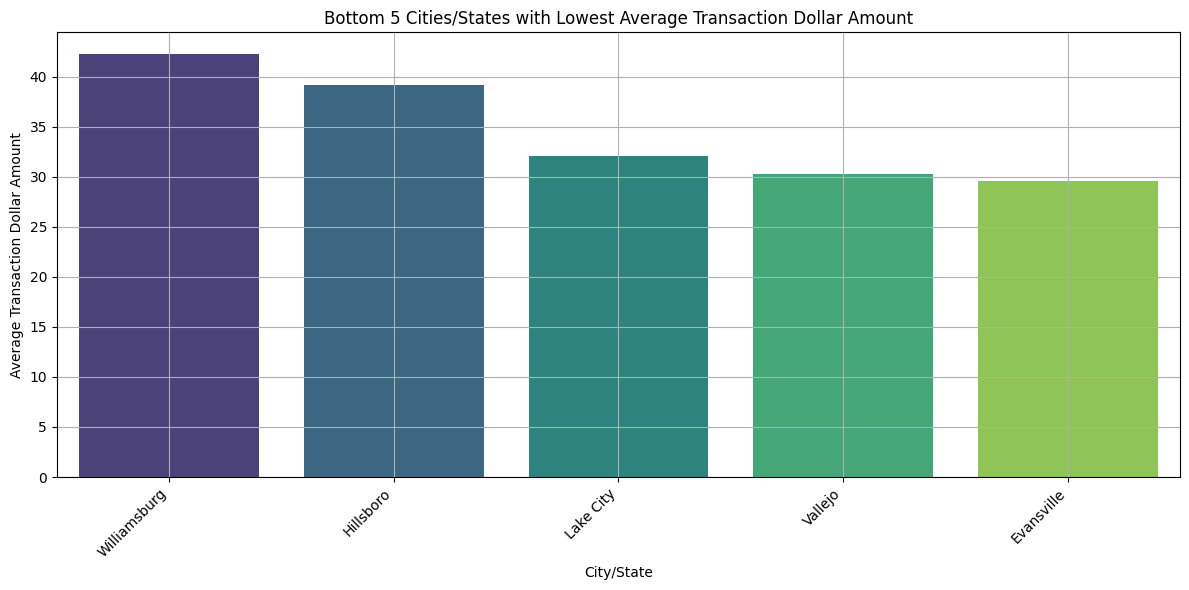

In [ ]:
# Calculate the average transaction dollar amount for each city or state
average_transaction_amount_per_city_state = merged_df.groupby('city')['transaction_dollar_amount'].mean().reset_index()

# Sort the data by average transaction dollar amount in descending order
average_transaction_amount_per_city_state = average_transaction_amount_per_city_state.sort_values(by='transaction_dollar_amount', ascending=False)

# Select the top 5 cities and bottom 5 cities
top_5_cities = average_transaction_amount_per_city_state.head(5)
bottom_5_cities = average_transaction_amount_per_city_state.tail(5)

# Create a bar plot for the top 5 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='transaction_dollar_amount', data=top_5_cities, palette='viridis')

plt.xlabel('City/State')
plt.ylabel('Average Transaction Dollar Amount')
plt.title('Top 5 Cities/States with Highest Average Transaction Dollar Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a bar plot for the bottom 5 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='transaction_dollar_amount', data=bottom_5_cities, palette='viridis')

plt.xlabel('City/State')
plt.ylabel('Average Transaction Dollar Amount')
plt.title('Bottom 5 Cities/States with Lowest Average Transaction Dollar Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

plt.show()


Transaction Dollar Amount vs. State:

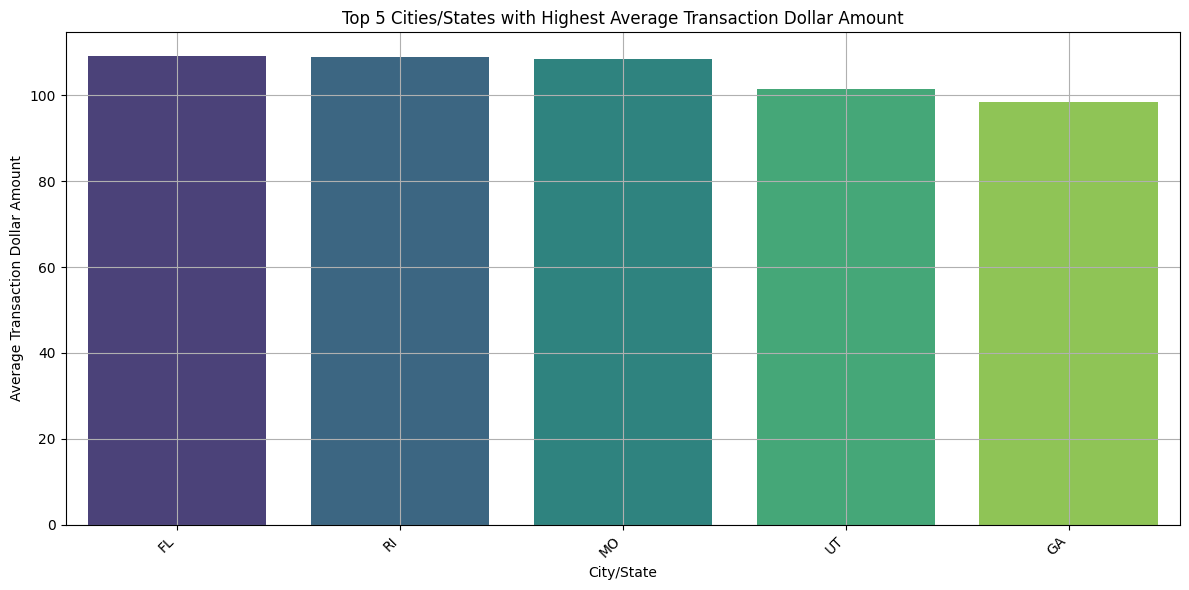

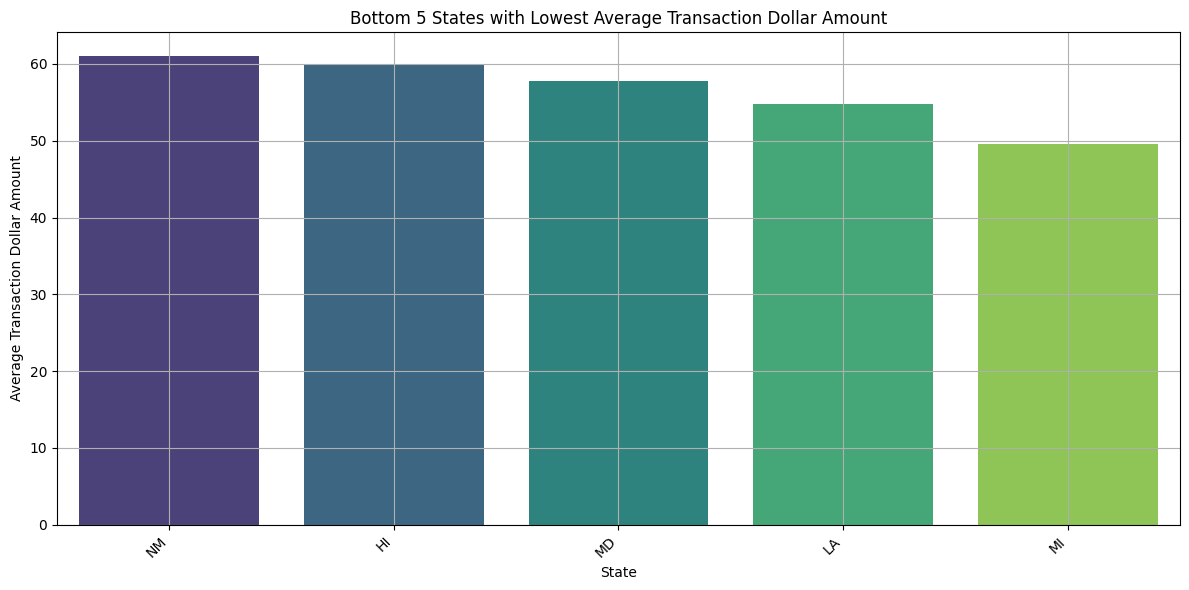

In [ ]:
# Calculate the average transaction dollar amount for each city or state
average_transaction_amount_per_city_state = merged_df.groupby('state')['transaction_dollar_amount'].mean().reset_index()

# Sort the data by average transaction dollar amount in descending order
average_transaction_amount_per_city_state = average_transaction_amount_per_city_state.sort_values(by='transaction_dollar_amount', ascending=False)

# Select the top 5 state  and bottom 5 state
top_5_cities = average_transaction_amount_per_city_state.head(5)
bottom_5_cities = average_transaction_amount_per_city_state.tail(5)

# Create a bar plot for the top 5 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='transaction_dollar_amount', data=top_5_cities, palette='viridis')

plt.xlabel('City/State')
plt.ylabel('Average Transaction Dollar Amount')
plt.title('Top 5 Cities/States with Highest Average Transaction Dollar Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

plt.show()

# Create a bar plot for the bottom 5 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='transaction_dollar_amount', data=bottom_5_cities, palette='viridis')

plt.xlabel('State')
plt.ylabel('Average Transaction Dollar Amount')
plt.title('Bottom 5 States with Lowest Average Transaction Dollar Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

plt.show()


Credit Card Limit vs. Latitude/Longitude

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



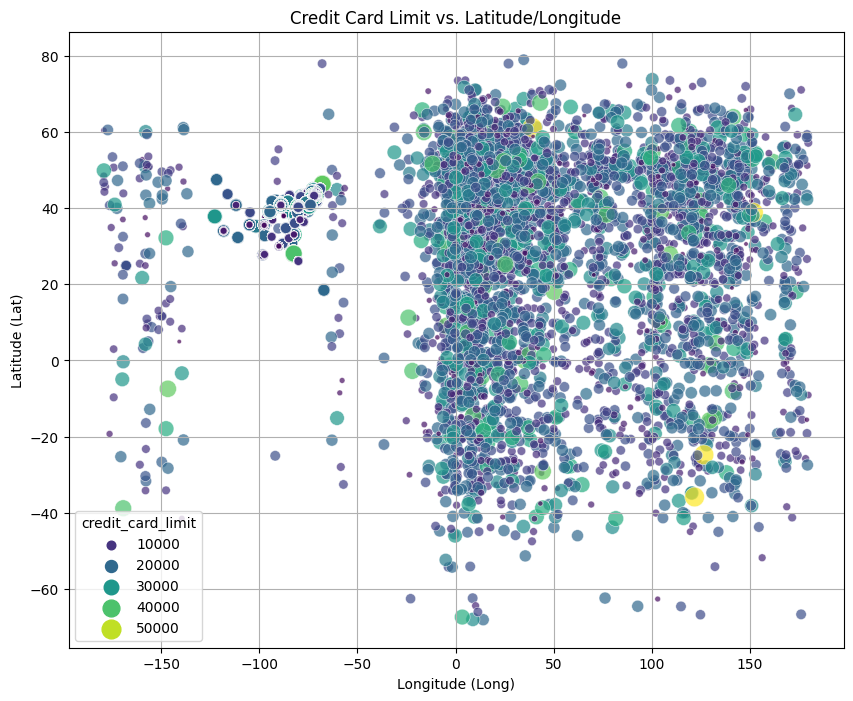

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Long', y='Lat', hue='credit_card_limit', data=gdf, palette='viridis', size='credit_card_limit', sizes=(10, 200), alpha=0.7)
plt.xlabel('Longitude (Long)')
plt.ylabel('Latitude (Lat)')
plt.title('Credit Card Limit vs. Latitude/Longitude')
plt.grid(True)
plt.show()


Credit Card Limit vs. Month

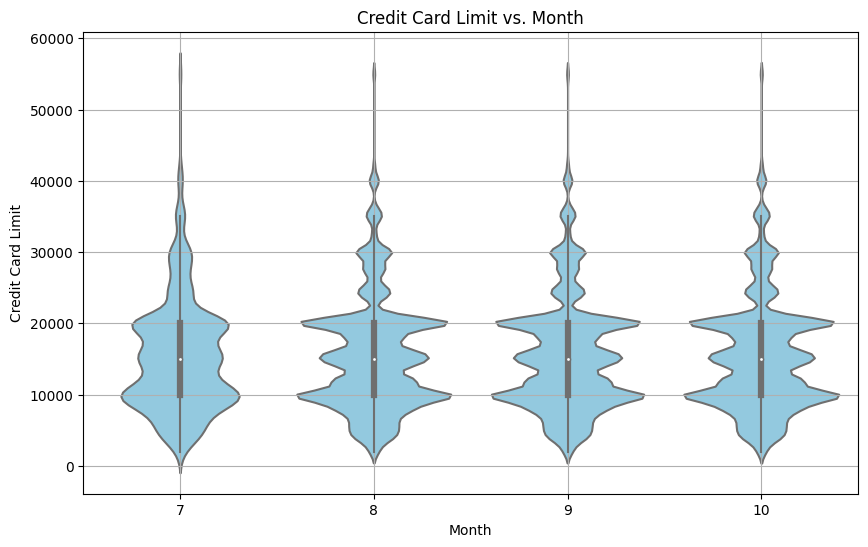

In [ ]:

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='month', y='credit_card_limit', data=merged_df, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Credit Card Limit')
plt.title('Credit Card Limit vs. Month')
plt.grid(True)
plt.show()


Credit Card Limit vs. City

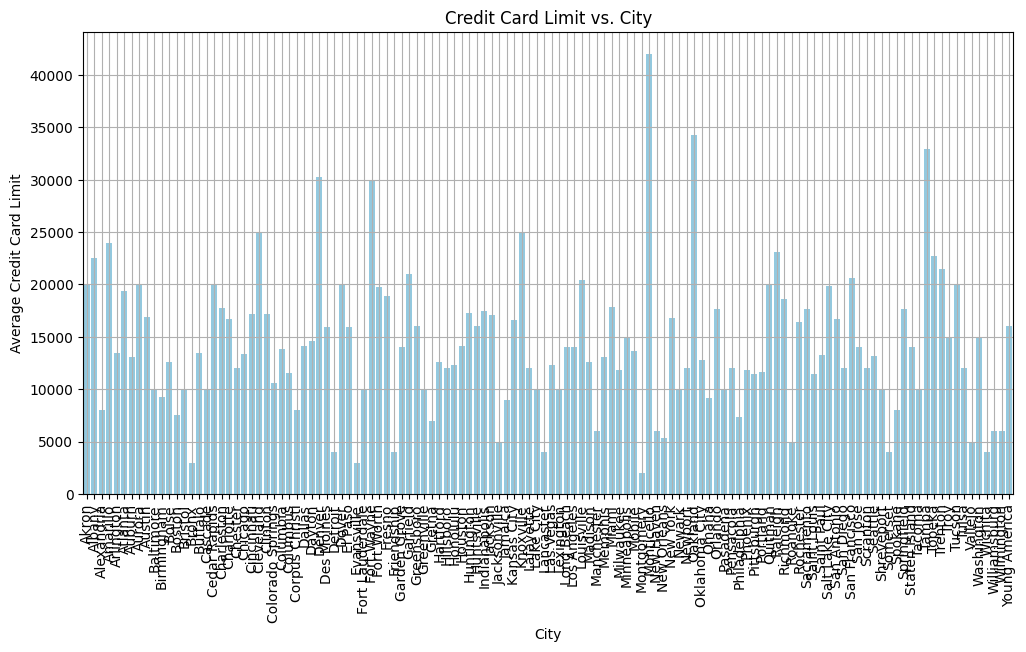

In [ ]:
# Calculate the average credit card limit for each city
average_credit_card_limit_per_city = merged_df.groupby('city')['credit_card_limit'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='credit_card_limit', data=average_credit_card_limit_per_city, color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Credit Card Limit')
plt.title('Credit Card Limit vs. City')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Credit Card Limit vs. State

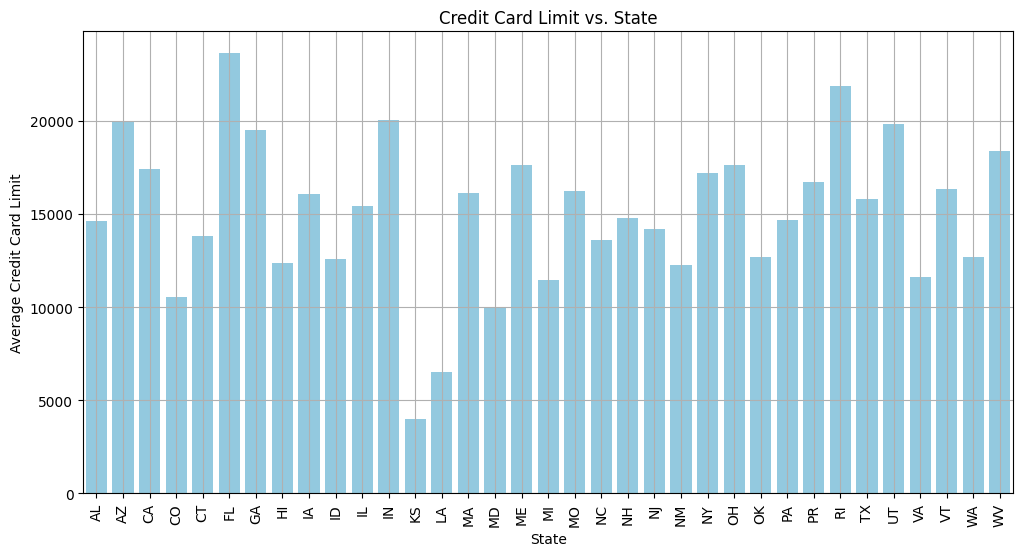

In [ ]:
# Calculate the average credit card limit for each city
average_credit_card_limit_per_city = merged_df.groupby('state')['credit_card_limit'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='credit_card_limit', data=average_credit_card_limit_per_city, color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Credit Card Limit')
plt.title('Credit Card Limit vs. State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Transaction Dollar Amount vs. Zip Code:

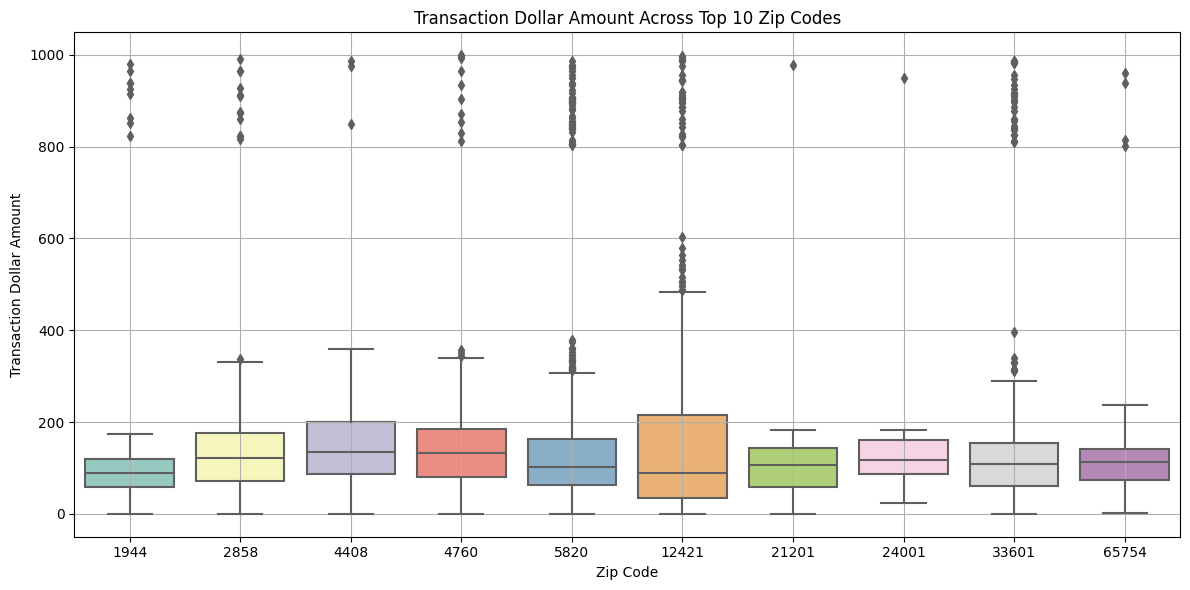

In [ ]:
# Choose the top N zip codes based on average transaction dollar amount
top_n_zipcodes = 10
top_zipcodes = merged_df.groupby('zipcode')['transaction_dollar_amount'].mean().nlargest(top_n_zipcodes).index

# Filter the data to include only the top N zip codes
filtered_data = merged_df[merged_df['zipcode'].isin(top_zipcodes)]

# Create a box plot or violin plot for Transaction Dollar Amount vs. Zip Code (Top N)
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='transaction_dollar_amount', data=filtered_data, palette='Set3')

# If you prefer a violin plot instead, uncomment the following line:
# sns.violinplot(x='zipcode', y='transaction_dollar_amount', data=filtered_data, palette='Set3')

plt.xlabel('Zip Code')
plt.ylabel('Transaction Dollar Amount')
plt.title(f'Transaction Dollar Amount Across Top {top_n_zipcodes} Zip Codes')
plt.grid(True)
plt.tight_layout()

plt.show()


Credit Card Limit vs. Month (Grouped by Year):

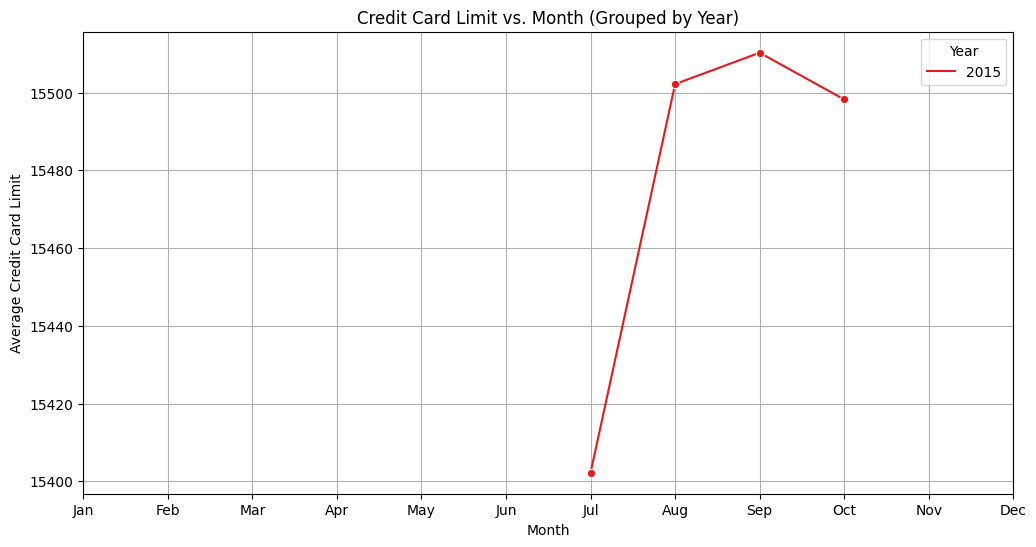

In [ ]:
average_credit_limit_per_month_year = merged_df.groupby(['year', 'month'])['credit_card_limit'].mean().reset_index()

# Step 3: Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='credit_card_limit', hue='year', data=average_credit_limit_per_month_year, marker='o', palette='Set1')

plt.xlabel('Month')
plt.ylabel('Average Credit Card Limit')
plt.title('Credit Card Limit vs. Month (Grouped by Year)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize x-axis labels
plt.grid(True)
plt.legend(title='Year', loc='upper right')

plt.show()


## **MULTIVARIATE ANALYSIS**

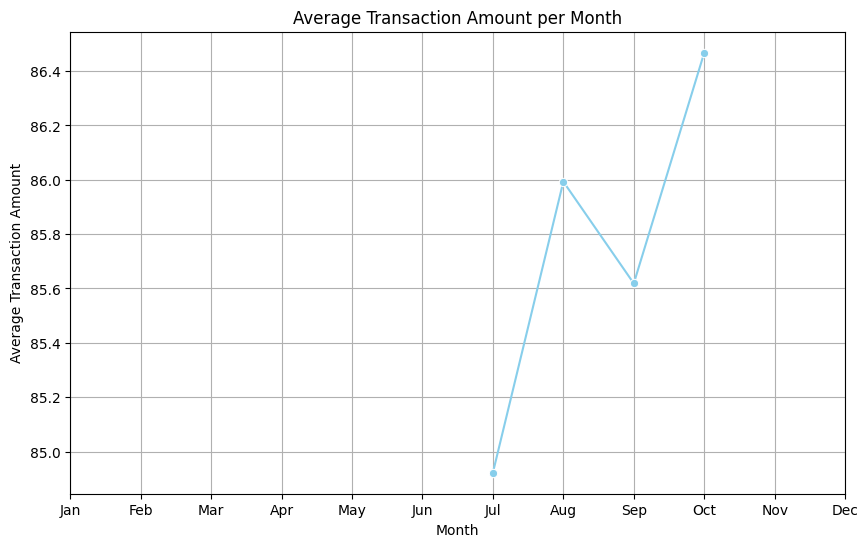

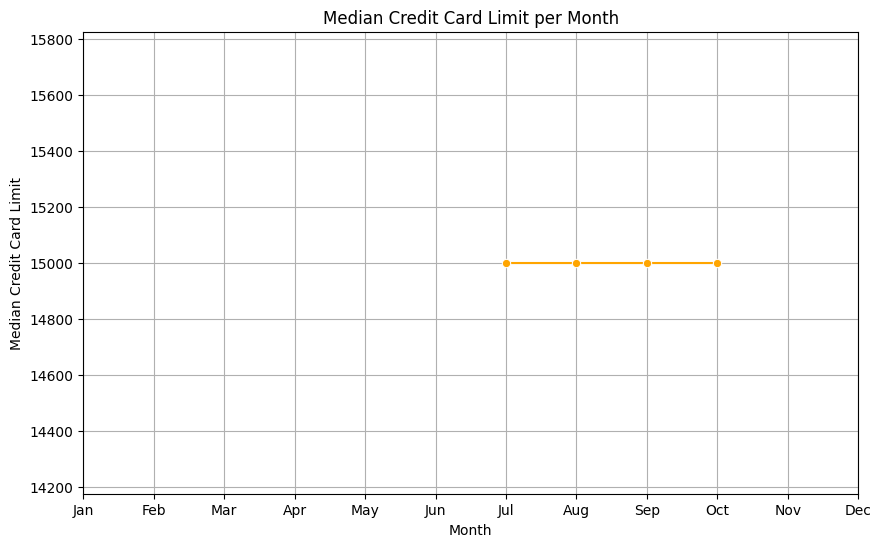

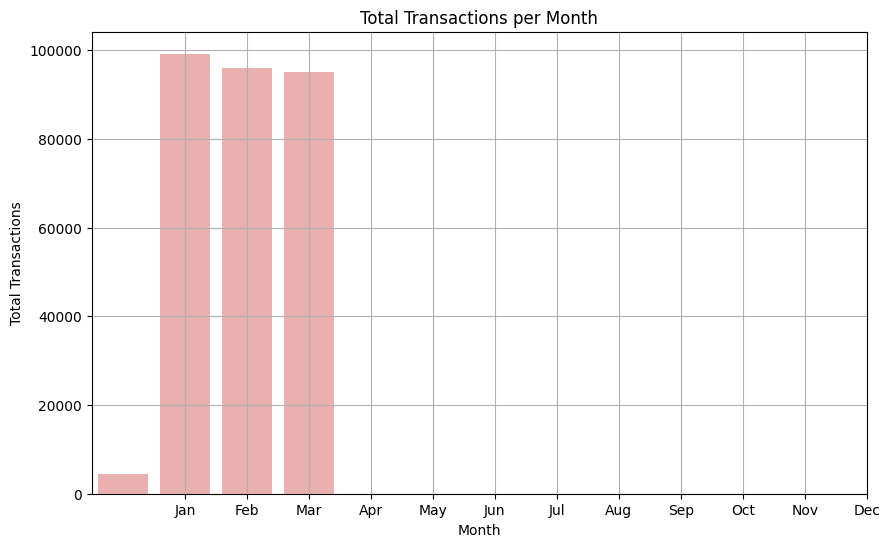

In [ ]:
# Group by Month and calculate the average transaction dollar amount for each month
average_transaction_amount_per_month = merged_df.groupby('month')['transaction_dollar_amount'].mean()

# Group by Month and calculate the total number of transactions for each month
total_transactions_per_month = merged_df.groupby('month').size()

# Group by Month and calculate the median credit card limit for each month
median_credit_card_limit_per_month = merged_df.groupby('month')['credit_card_limit'].median()

# Create a line plot for Average Transaction Amount per Month
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_transaction_amount_per_month.index, y=average_transaction_amount_per_month.values, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount per Month')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Create a line plot for Median Credit Card Limit per Month
plt.figure(figsize=(10, 6))
sns.lineplot(x=median_credit_card_limit_per_month.index, y=median_credit_card_limit_per_month.values, marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Median Credit Card Limit')
plt.title('Median Credit Card Limit per Month')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Create a bar plot for Total Transactions per Month
plt.figure(figsize=(10, 6))
sns.barplot(x=total_transactions_per_month.index, y=total_transactions_per_month.values, color='lightcoral', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Month')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


<ipython-input-103-745dcee8102a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



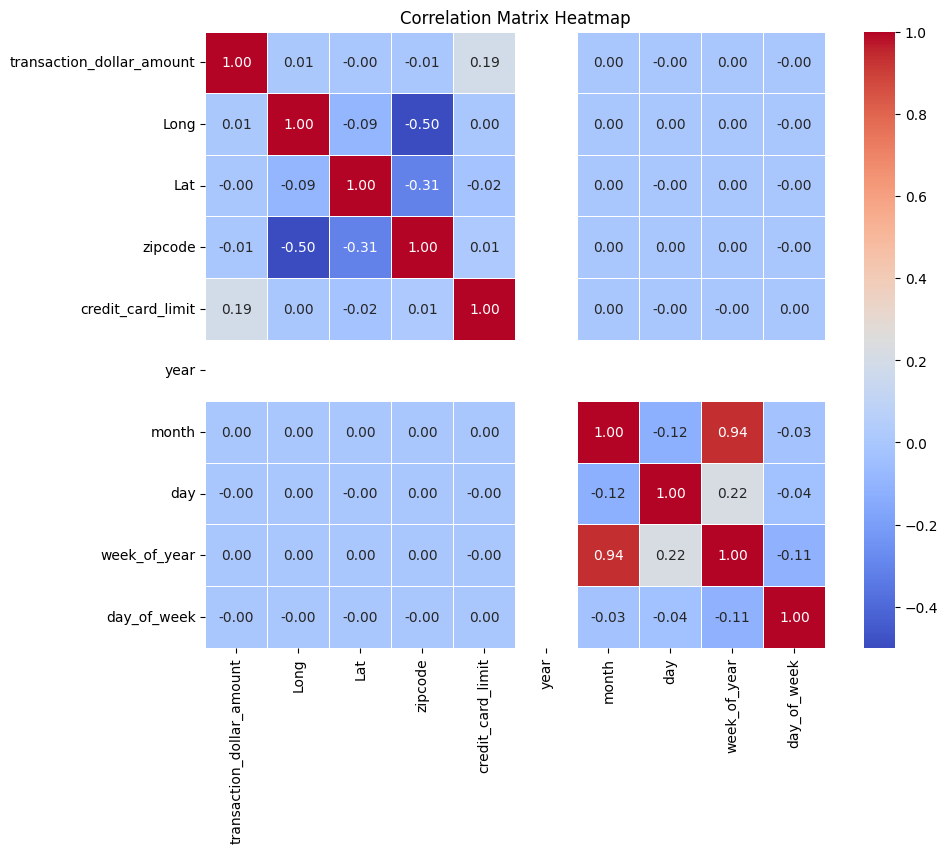

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Transaction Dollar Amount vs. State vs. Credit Card Limit vs. Month:

<ipython-input-104-0fc02caffa51>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




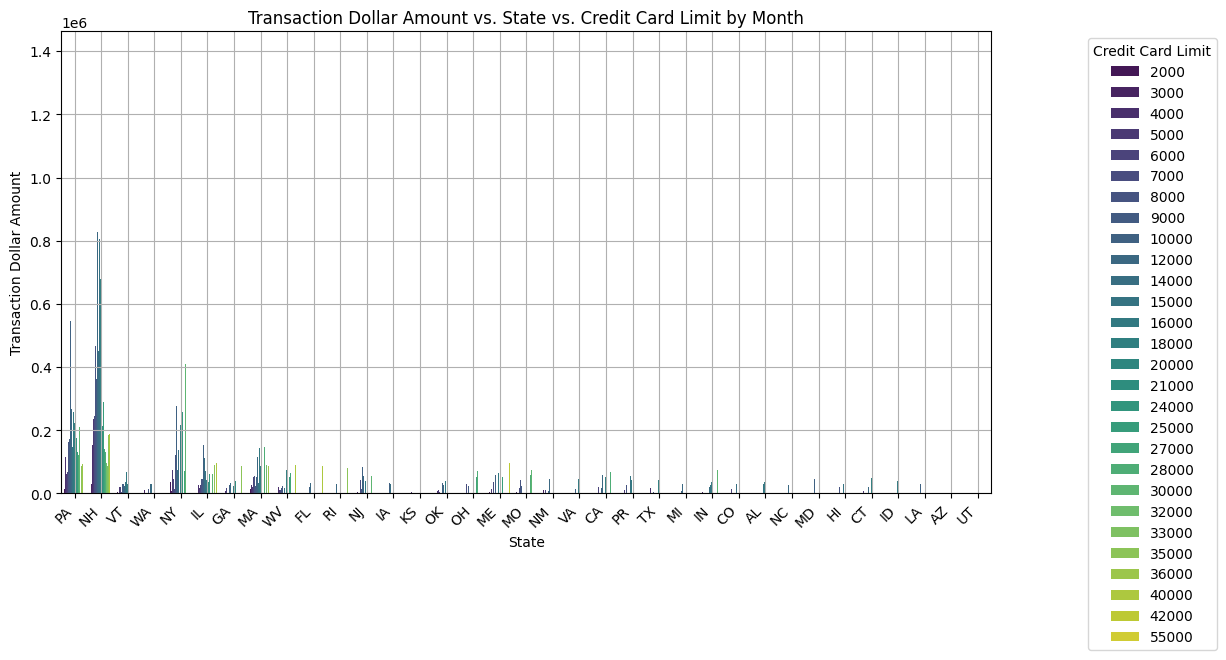

In [ ]:

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='transaction_dollar_amount', hue='credit_card_limit', data=merged_df, ci=None, palette='viridis', estimator=sum)
plt.xlabel('State')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount vs. State vs. Credit Card Limit by Month')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Transaction Dollar Amount vs. Credit Card Limit vs. City

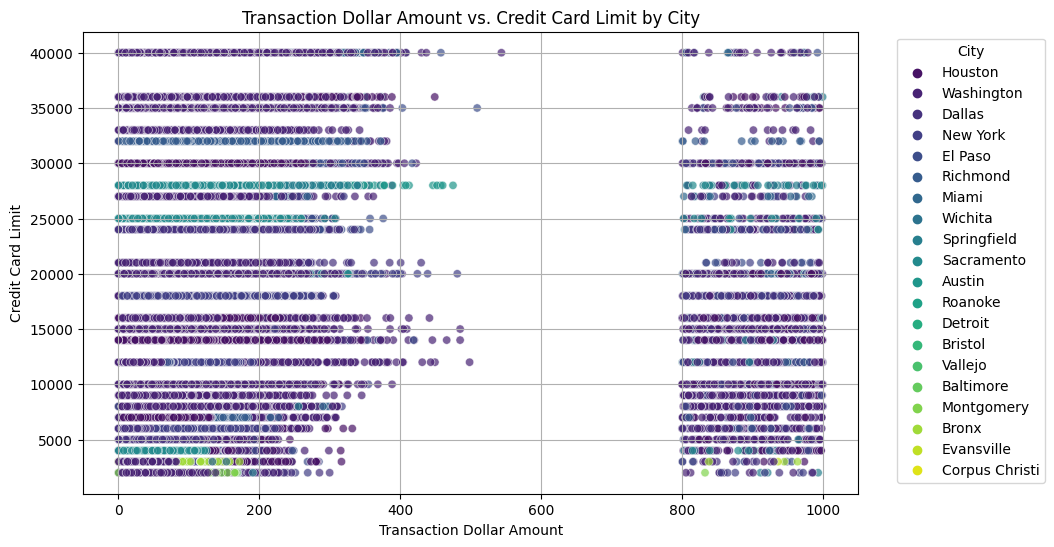

In [ ]:
# Calculate the total transaction dollar amount for each city
city_total_transactions = merged_df.groupby('city')['transaction_dollar_amount'].sum().sort_values(ascending=False)

# Get the top 10 cities and bottom 10 cities based on total transaction dollar amount
top_cities = city_total_transactions.head(10).index
bottom_cities = city_total_transactions.tail(10).index

# Filter the data to include only the top and bottom cities
filtered_df = merged_df[merged_df['city'].isin(top_cities) | merged_df['city'].isin(bottom_cities)]

# Create a scatter plot for the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='transaction_dollar_amount', y='credit_card_limit', hue='city', data=filtered_df, palette='viridis', alpha=0.7)
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Credit Card Limit')
plt.title('Transaction Dollar Amount vs. Credit Card Limit by City')
plt.grid(True)
plt.legend(title='City', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


<ipython-input-106-48b264bf8720>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




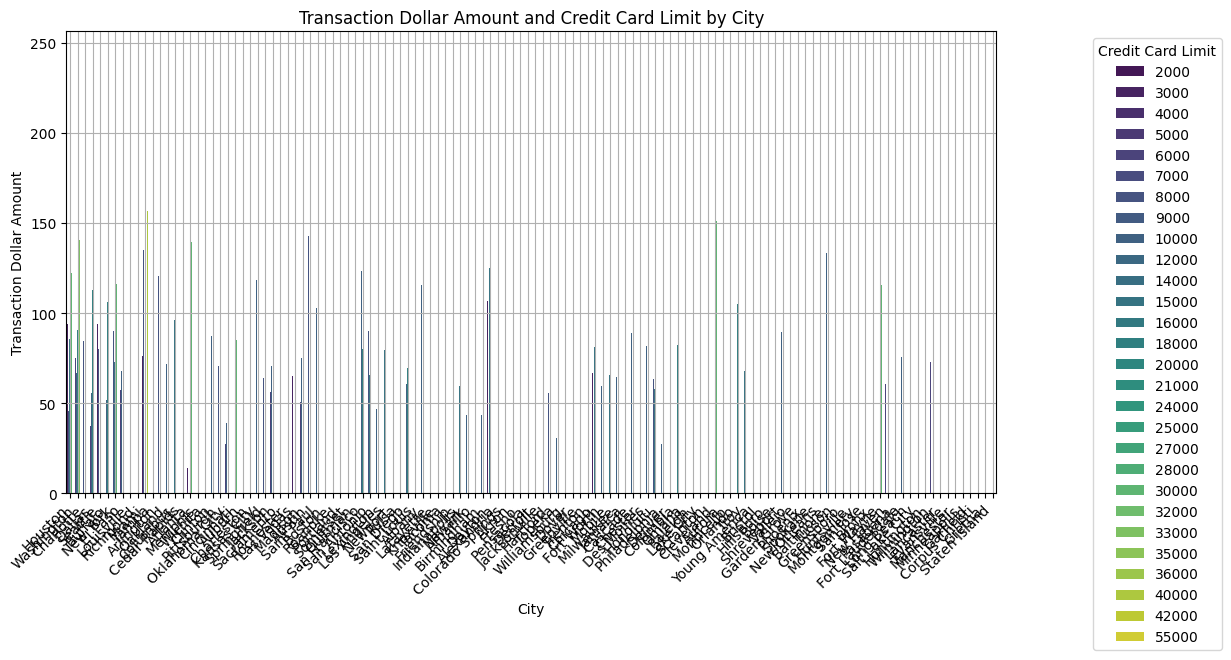

In [ ]:
# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='transaction_dollar_amount', hue='credit_card_limit', data=merged_df, ci=None, palette='viridis')
plt.xlabel('City')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount and Credit Card Limit by City')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


<ipython-input-148-d09101b572b1>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




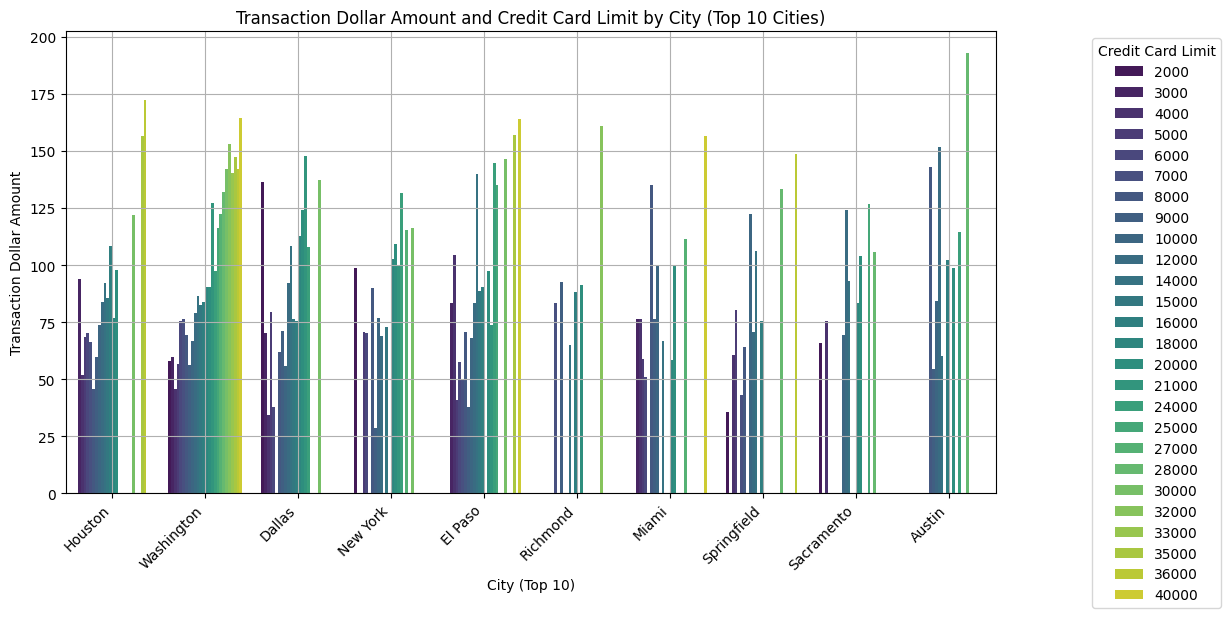

<ipython-input-148-d09101b572b1>:24: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




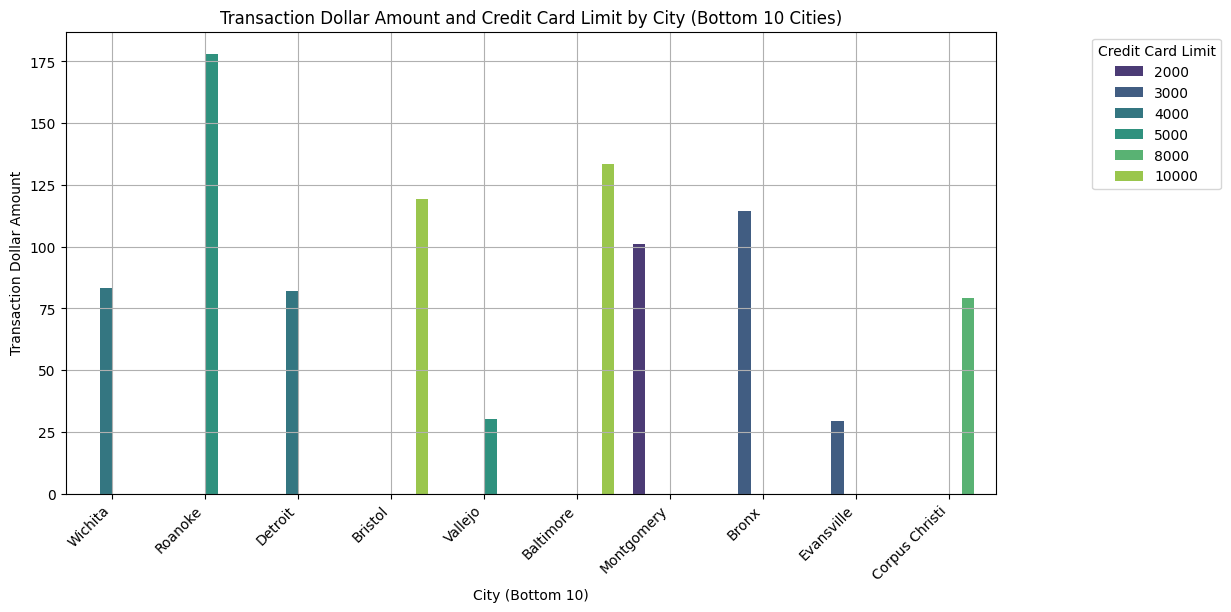

In [ ]:
# Calculate the total transaction dollar amount for each city
city_totals = merged_df.groupby('city')['transaction_dollar_amount'].sum().sort_values()

# Get the top 10 and bottom 10 cities based on the transaction dollar amount
top_10_cities = city_totals.tail(10).index.tolist()
bottom_10_cities = city_totals.head(10).index.tolist()

# Filter the data to include only the top and bottom 10 cities
top_10_df = merged_df[merged_df['city'].isin(top_10_cities)]
bottom_10_df = merged_df[merged_df['city'].isin(bottom_10_cities)]

# Create grouped bar plots for the top 10 and bottom 10 cities
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='transaction_dollar_amount', hue='credit_card_limit', data=top_10_df, ci=None, palette='viridis')
plt.xlabel('City (Top 10)')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount and Credit Card Limit by City (Top 10 Cities)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='transaction_dollar_amount', hue='credit_card_limit', data=bottom_10_df, ci=None, palette='viridis')
plt.xlabel('City (Bottom 10)')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount and Credit Card Limit by City (Bottom 10 Cities)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

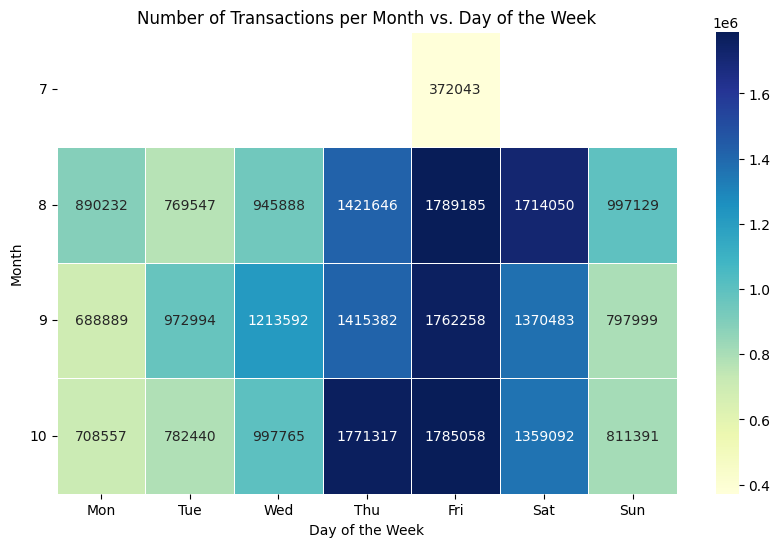

In [ ]:
# Create a pivot table to sum the number of transactions for each combination of Month and Day of the Week
transactions_pivot = pd.pivot_table(merged_df, index='month', columns='day_of_week', values='transaction_dollar_amount', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(transactions_pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Number of Transactions per Month vs. Day of the Week')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(rotation=0)
plt.show()


Transaction Dollar Amount vs. Month vs. Credit Card Limit:

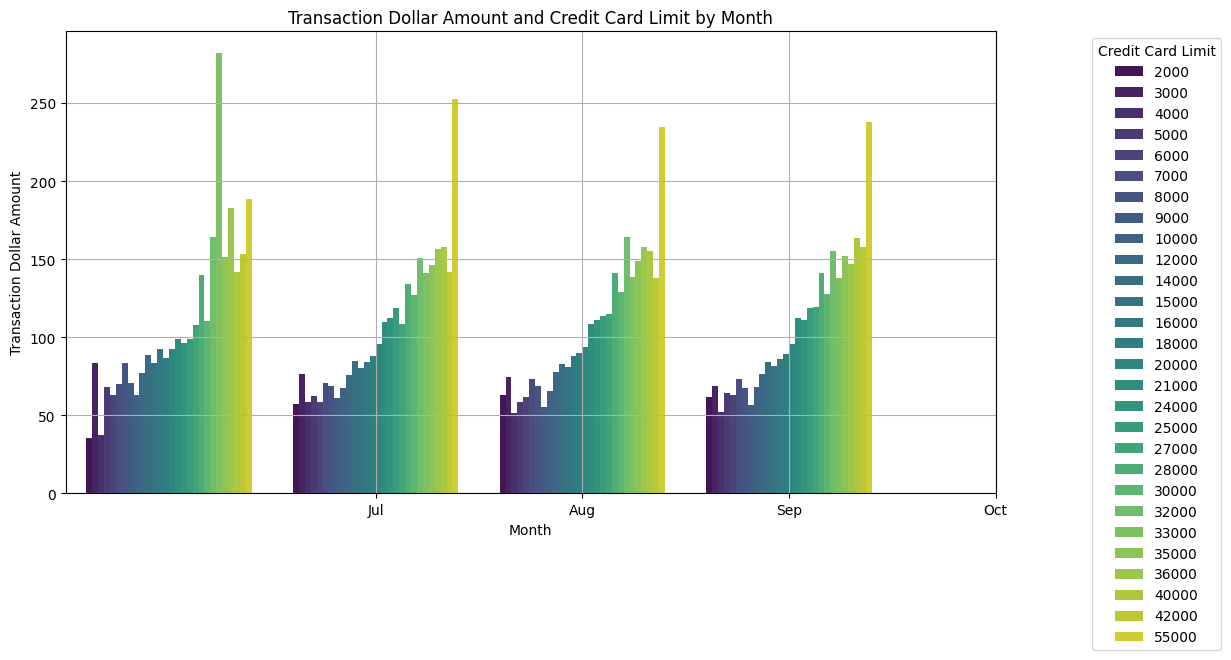

In [ ]:
# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='transaction_dollar_amount', hue='credit_card_limit', data=merged_df, errorbar=None, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount and Credit Card Limit by Month')

# Extract month labels and set them as x-axis labels
month_labels = [calendar.month_abbr[i] for i in sorted(merged_df['month'].unique())]
plt.xticks(ticks=range(1, len(month_labels) + 1), labels=month_labels)

plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


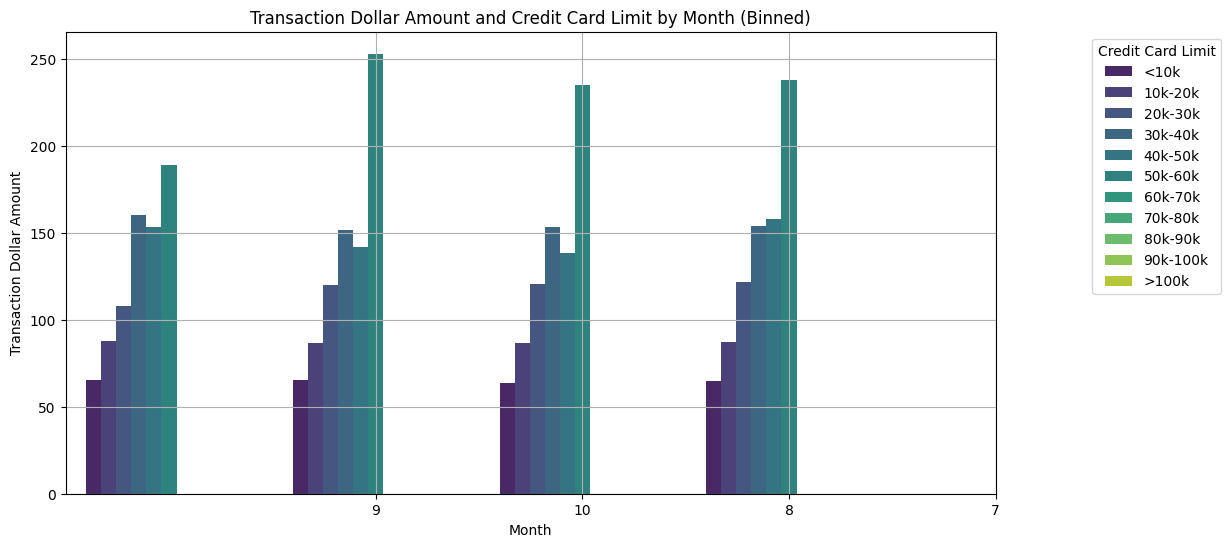

In [ ]:
# Create bins for Credit Card Limit
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, np.inf]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '>100k']

# Bin the data and create a new column 'credit_card_limit_bin'
merged_df['credit_card_limit_bin'] = pd.cut(merged_df['credit_card_limit'], bins=bins, labels=labels)

# Create a grouped bar plot using the binned data
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='transaction_dollar_amount', hue='credit_card_limit_bin', data=merged_df, errorbar=None, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount and Credit Card Limit by Month (Binned)')
plt.xticks(ticks=range(1, len(merged_df['month'].unique()) + 1), labels=merged_df['month'].unique())
plt.grid(True)
plt.legend(title='Credit Card Limit', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


ValueError: ignored

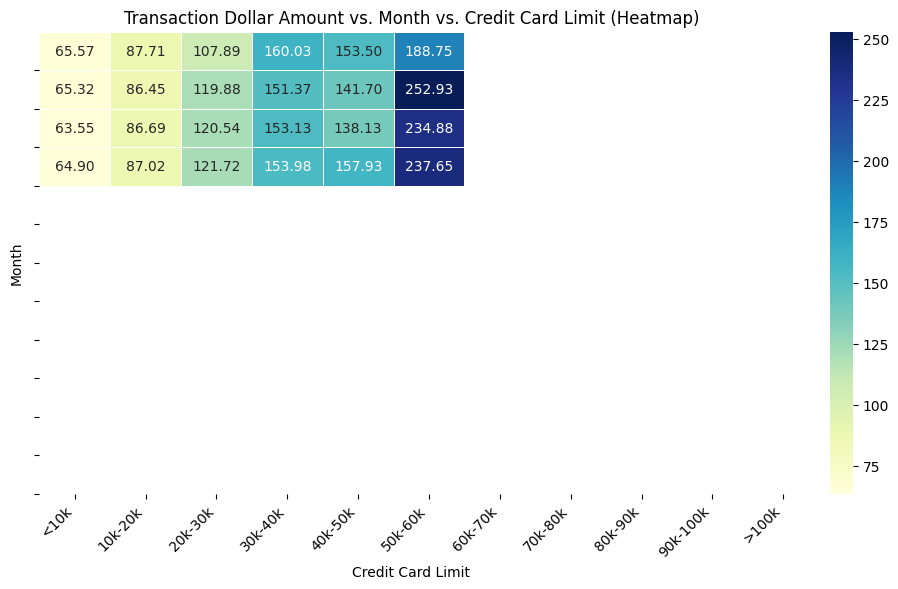

In [ ]:
# Pivot the data to create a matrix for the heatmap
transactions_pivot = merged_df.pivot_table(index='month', columns='credit_card_limit_bin', values='transaction_dollar_amount', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(transactions_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.xlabel('Credit Card Limit')
plt.ylabel('Month')
plt.title('Transaction Dollar Amount vs. Month vs. Credit Card Limit (Heatmap)')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45, ha='right')
plt.yticks(ticks=range(1, 13), labels=month_labels)
plt.show()


Transaction Dollar Amount vs. State vs. Day of the Week

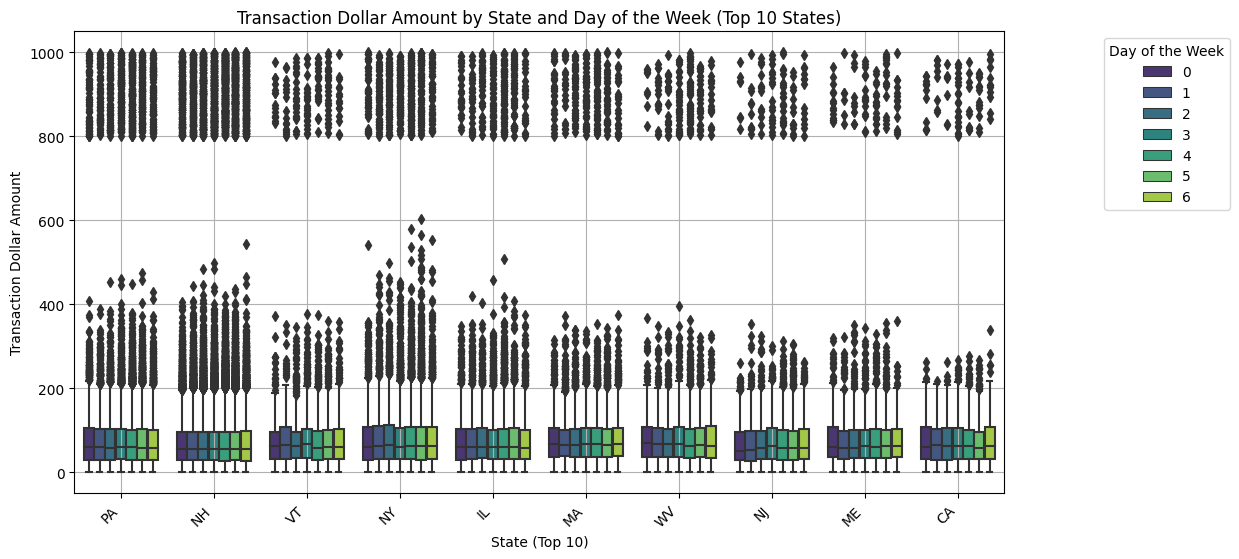

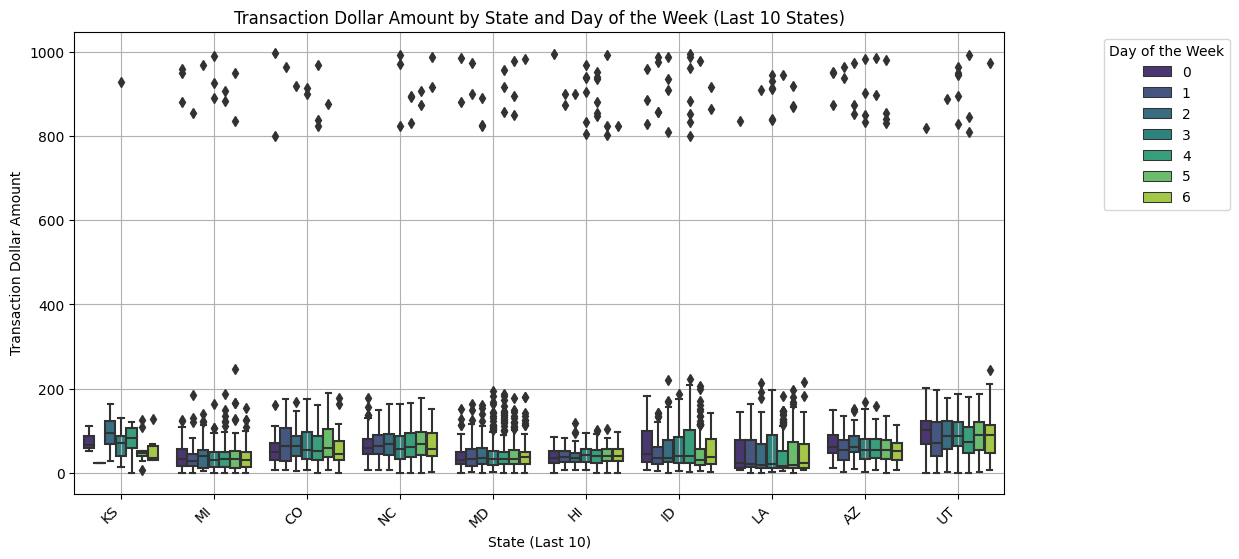

In [ ]:
# Calculate the total transaction dollar amount for each state
state_totals = merged_df.groupby('state')['transaction_dollar_amount'].sum().sort_values()

# Get the top 10 and last 10 states based on the transaction dollar amount
top_10_states = state_totals.tail(10).index.tolist()
last_10_states = state_totals.head(10).index.tolist()

# Filter the data to include only the top and last 10 states
top_10_df = merged_df[merged_df['state'].isin(top_10_states)]
last_10_df = merged_df[merged_df['state'].isin(last_10_states)]

# Create separate box plots for the top 10 and last 10 states
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='transaction_dollar_amount', hue='day_of_week', data=top_10_df, palette='viridis')
plt.xlabel('State (Top 10)')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount by State and Day of the Week (Top 10 States)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Day of the Week', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='transaction_dollar_amount', hue='day_of_week', data=last_10_df, palette='viridis')
plt.xlabel('State (Last 10)')
plt.ylabel('Transaction Dollar Amount')
plt.title('Transaction Dollar Amount by State and Day of the Week (Last 10 States)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Day of the Week', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


Transaction Dollar Amount vs. Month vs. Day of the Week:

In [ ]:
merged_df['month'].unique()

array([ 9, 10,  8,  7])

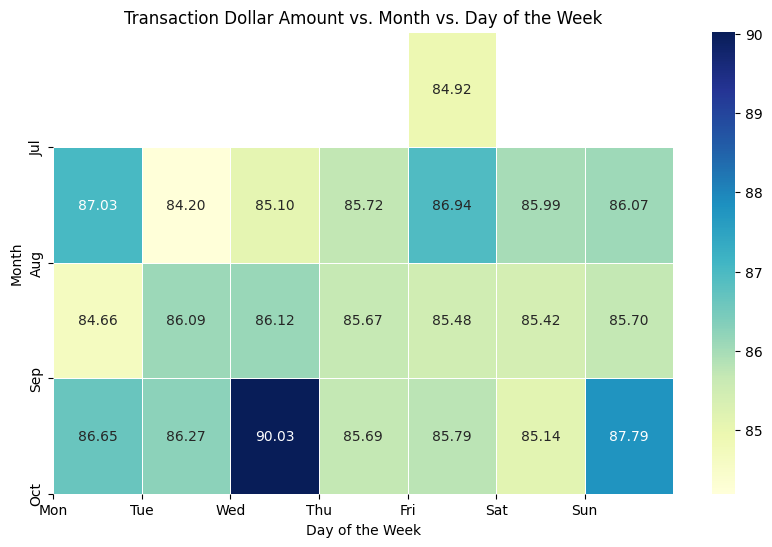

In [ ]:
import calendar

# Pivot the data to create a matrix for the heatmap
transactions_pivot = merged_df.pivot_table(index='month', columns='day_of_week', values='transaction_dollar_amount', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(transactions_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Transaction Dollar Amount vs. Month vs. Day of the Week')

# Extract month labels and set them as y-axis labels
month_labels = [calendar.month_abbr[i] for i in sorted(merged_df['month'].unique())]
plt.yticks(ticks=range(1, len(month_labels) + 1), labels=month_labels)

# Extract day of the week labels and set them as x-axis labels
day_labels = calendar.day_abbr
plt.xticks(ticks=range(7), labels=day_labels)

plt.show()


## **ANSWERING BUSINESS QUESTIONS**

### **Research Questions:**

#### **Transaction Analysis:**

1. What are the top 10 cities with the highest total transaction dollar amount?

2. What is the total transaction dollar amount for each month in the dataset?

3. How many transactions were made in each city?


#### **Credit Card Analysis:**
1. Which state has the highest average credit card limit?
2. What are the top 5 credit cards with the highest total transaction dollar amounts?
3. What is the average credit card limit for each state?
4. Is there any correlation between credit card limits and transaction dollar amounts? If yes, what is the correlation coefficient?
5. What is the total transaction dollar amount for each credit card?
6. Which credit card has the highest average transaction dollar amount?
7. What is the average credit card limit across all credit cards in the dataset?
8. Is there any relationship between credit card limits and the lat and long locations?


1. What are the top 10 cities with the highest total transaction dollar amount?

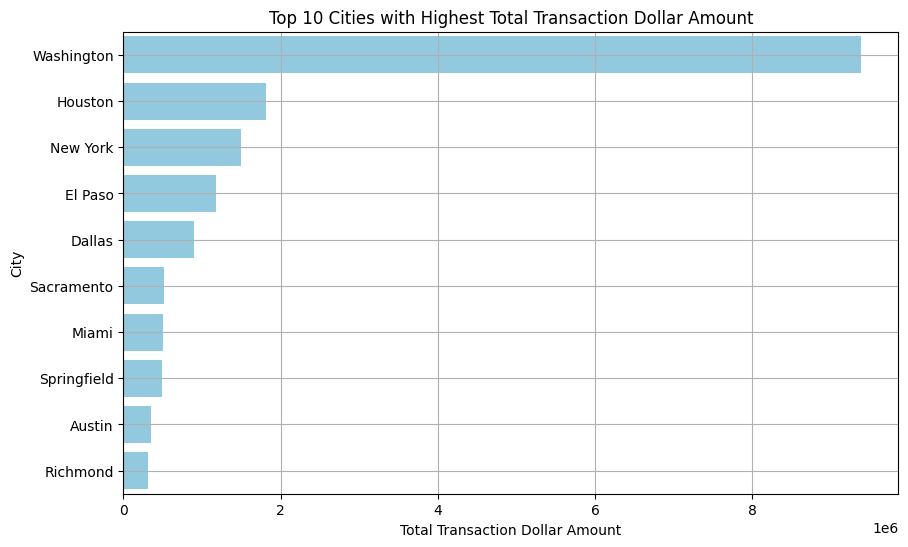

In [ ]:
# Group the data by city and calculate the total transaction dollar amount for each city
city_transaction_totals = merged_df.groupby('city')['transaction_dollar_amount'].sum()

# Sort the cities based on their total transaction dollar amounts in descending order
sorted_cities = city_transaction_totals.sort_values(ascending=False)

# Get the top 10 cities with the highest total transaction dollar amount
top_10_cities = sorted_cities.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, color='skyblue')
plt.xlabel('Total Transaction Dollar Amount')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Total Transaction Dollar Amount')
plt.grid(True)
plt.show()


2. What is the total transaction dollar amount for each month in the dataset?

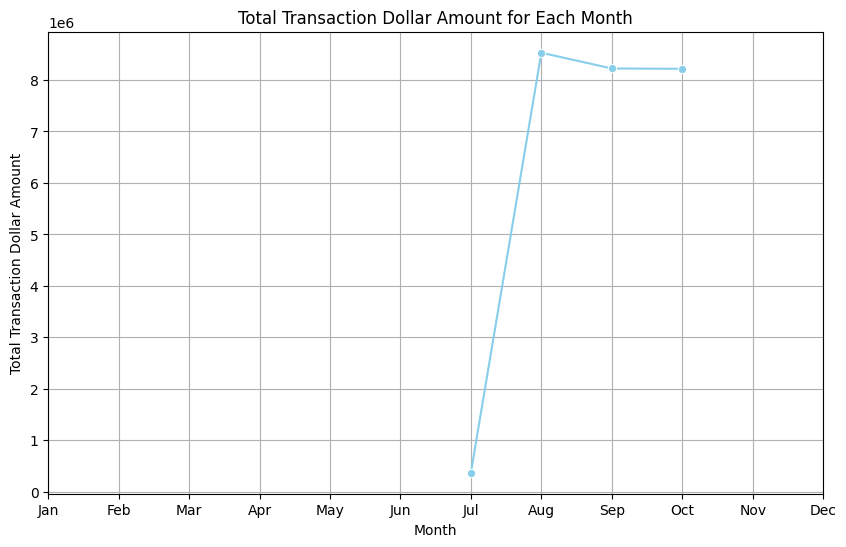

In [ ]:
# Group the data by month and calculate the total transaction dollar amount for each month
monthly_transaction_totals = merged_df.groupby('month')['transaction_dollar_amount'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_transaction_totals.index, y=monthly_transaction_totals.values, marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Transaction Dollar Amount')
plt.title('Total Transaction Dollar Amount for Each Month')
plt.grid(True)
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


3. How many transactions were made in each city?

In [ ]:
# Group the data by city and count the number of transactions in each city
transactions_per_city = merged_df.groupby('city')['transaction_dollar_amount'].count()

print(transactions_per_city)


city
Akron              1447
Albany             1884
Alexandria          304
Amarillo            564
Arlington          1375
                  ...  
Washington       112693
Wichita              53
Williamsburg        257
Wilmington          165
Young America       464
Name: transaction_dollar_amount, Length: 124, dtype: int64


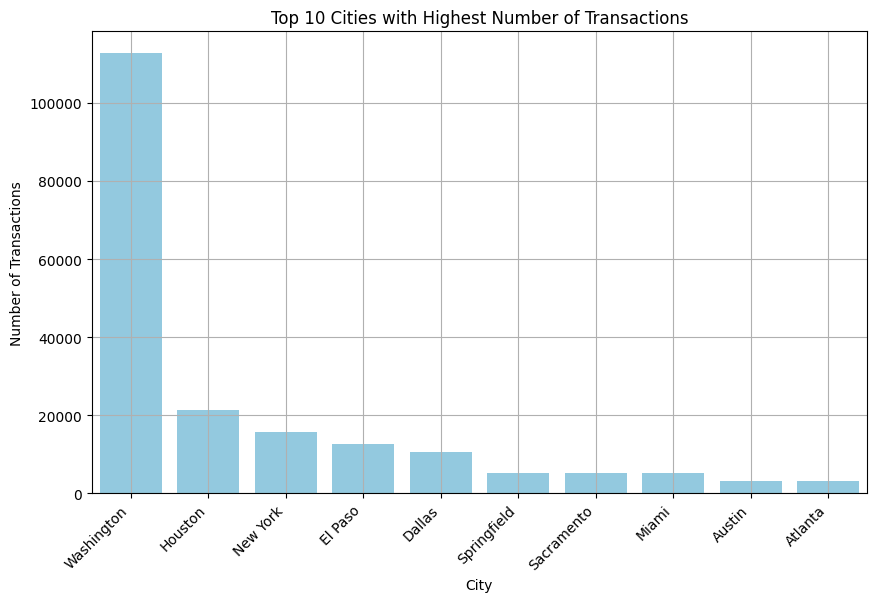

In [ ]:
# Sort the cities based on the number of transactions in descending order
sorted_cities = transactions_per_city.sort_values(ascending=False)

# Get the top 10 cities with the highest number of transactions
top_10_cities = sorted_cities.head(10)

# Create a bar plot for the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Cities with Highest Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


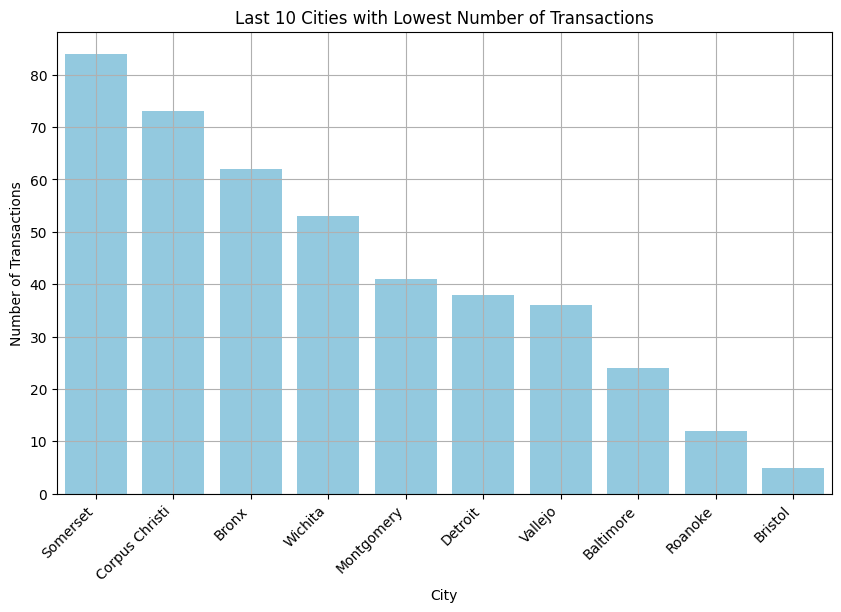

In [ ]:
# Get the top 10 cities with the highest number of transactions
last_10_cities = sorted_cities.tail(10)

# Create a bar plot for the last 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=last_10_cities.index, y=last_10_cities.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Last 10 Cities with Lowest Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


Which state has the highest average credit card limit?

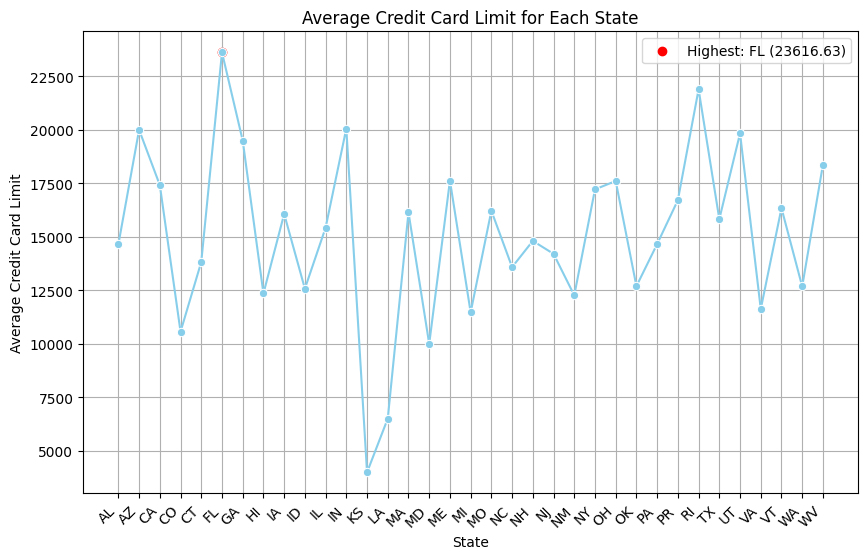

In [ ]:
# Group the data by state and calculate the average credit card limit for each state
state_credit_limit_avg = merged_df.groupby('state')['credit_card_limit'].mean()

# Find the state with the highest average credit card limit
highest_state = state_credit_limit_avg.idxmax()
highest_limit = state_credit_limit_avg.max()

# Create a line plot for all states' average credit card limits
plt.figure(figsize=(10, 6))
sns.lineplot(x=state_credit_limit_avg.index, y=state_credit_limit_avg.values, marker='o', color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Credit Card Limit')
plt.title('Average Credit Card Limit for Each State')
plt.grid(True)

# Highlight the state with the highest average credit card limit
plt.scatter(highest_state, highest_limit, marker='o', color='red', label=f'Highest: {highest_state} ({highest_limit:.2f})')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.show()


What are the top 5 credit cards with the highest total transaction dollar amounts?

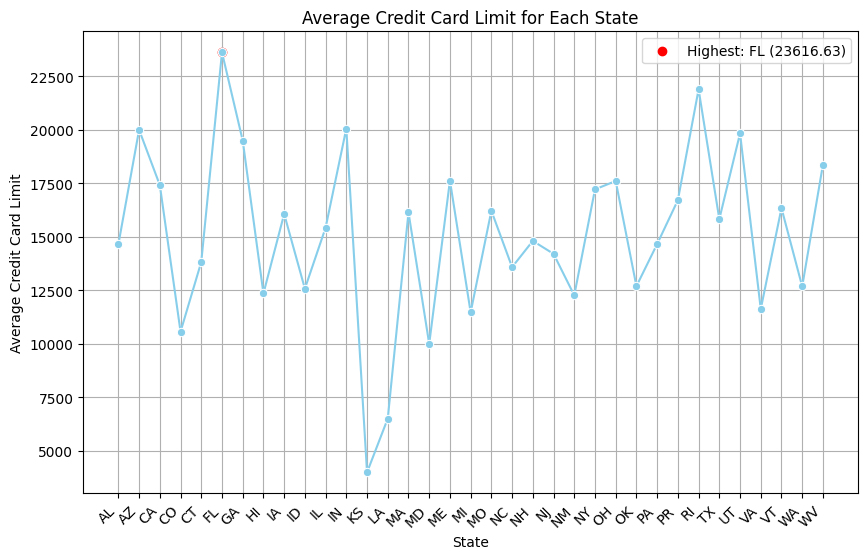

In [ ]:

# Group the data by state and calculate the average credit card limit for each state
state_credit_limit_avg = merged_df.groupby('state')['credit_card_limit'].mean()

# Find the state with the highest average credit card limit
highest_state = state_credit_limit_avg.idxmax()
highest_limit = state_credit_limit_avg.max()

# Create a line plot for all states' average credit card limits
plt.figure(figsize=(10, 6))
sns.lineplot(x=state_credit_limit_avg.index, y=state_credit_limit_avg.values, marker='o', color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Credit Card Limit')
plt.title('Average Credit Card Limit for Each State')
plt.grid(True)

# Highlight the state with the highest average credit card limit
plt.scatter(highest_state, highest_limit, marker='o', color='red', label=f'Highest: {highest_state} ({highest_limit:.2f})')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.show()


correlation between credit card limits and transaction dollar amounts

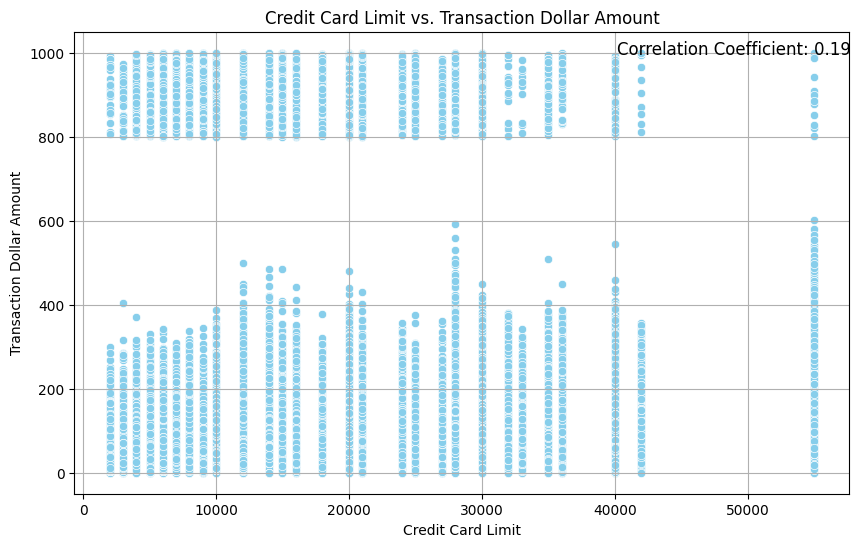

In [ ]:
# Create a scatter plot to visualize the relationship between credit card limits and transaction dollar amounts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_card_limit', y='transaction_dollar_amount', data=merged_df, color='skyblue')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.title('Credit Card Limit vs. Transaction Dollar Amount')
plt.grid(True)

# Calculate the correlation coefficient between credit card limits and transaction dollar amounts
correlation_coefficient = np.corrcoef(merged_df['credit_card_limit'], merged_df['transaction_dollar_amount'])[0, 1]

# Add the correlation coefficient to the plot as text
plt.text(0.7, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()


What is the total transaction dollar amount for each credit card?

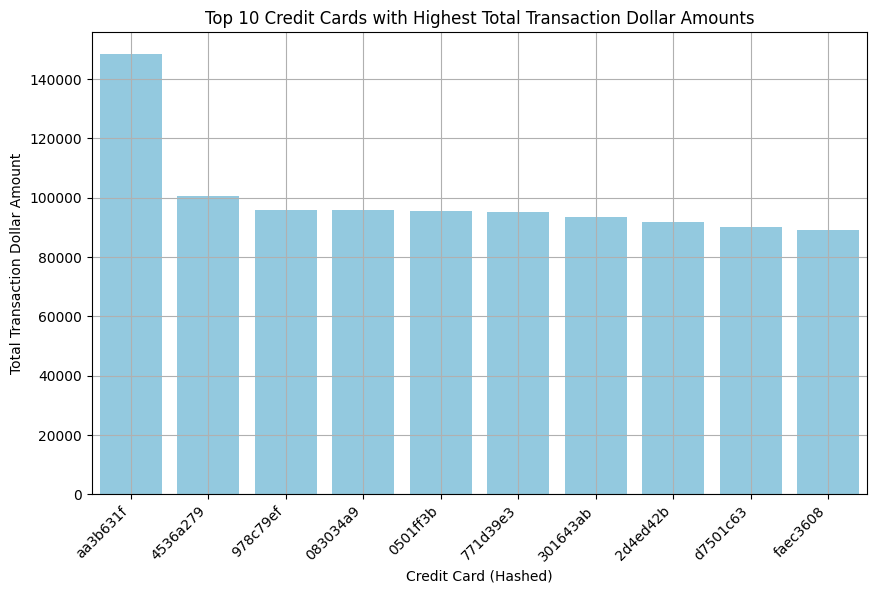

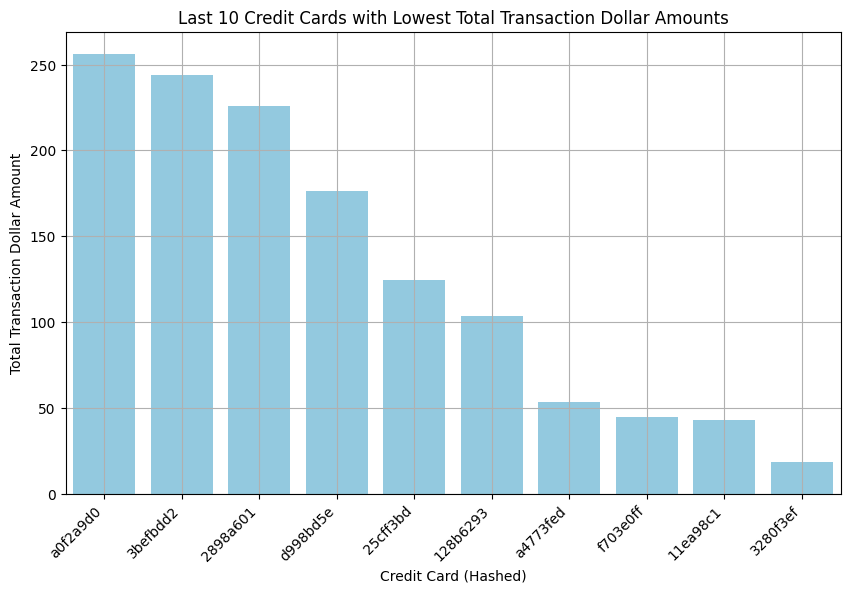

In [ ]:
# Group the data by hashed credit card number and calculate the total transaction dollar amount for each credit card
credit_card_totals = merged_df.groupby('hashed_credit_card')['transaction_dollar_amount'].sum()

# Sort the credit cards based on their total transaction dollar amounts in descending order
sorted_credit_cards = credit_card_totals.sort_values(ascending=False)

# Get the top 10 and last 10 credit cards with the highest and lowest total transaction dollar amounts
top_10_credit_cards = sorted_credit_cards.head(10)
last_10_credit_cards = sorted_credit_cards.tail(10)

# Create a bar plot for the top 10 credit cards
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_credit_cards.index, y=top_10_credit_cards.values, color='skyblue')
plt.xlabel('Credit Card (Hashed)')
plt.ylabel('Total Transaction Dollar Amount')
plt.title('Top 10 Credit Cards with Highest Total Transaction Dollar Amounts')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Create a bar plot for the last 10 credit cards
plt.figure(figsize=(10, 6))
sns.barplot(x=last_10_credit_cards.index, y=last_10_credit_cards.values, color='skyblue')
plt.xlabel('Credit Card (Hashed)')
plt.ylabel('Total Transaction Dollar Amount')
plt.title('Last 10 Credit Cards with Lowest Total Transaction Dollar Amounts')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


average credit card limit across all credit cards in the dataset

In [ ]:
# Assuming you have already read the 'merged_df' DataFrame

# Calculate the average credit card limit
average_credit_card_limit = merged_df['credit_card_limit'].mean()

print("Average Credit Card Limit:", average_credit_card_limit)


Average Credit Card Limit: 15502.053715697855


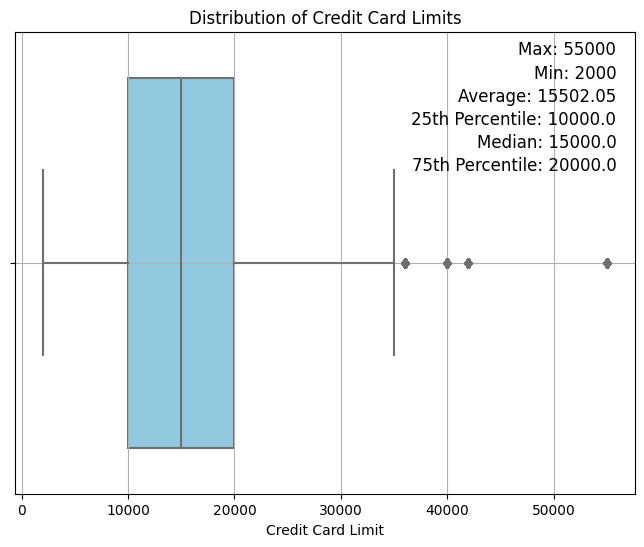

In [ ]:
# Create a box plot to visualize the distribution of credit card limits
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['credit_card_limit'], color='skyblue')
plt.xlabel('Credit Card Limit')
plt.title('Distribution of Credit Card Limits')
plt.grid(True)

# Add labels for key statistics (max, min, average, and percentiles) on the top right
credit_card_limits = merged_df['credit_card_limit']
plt.text(0.97, 0.95, f"Max: {credit_card_limits.max()}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.97, 0.9, f"Min: {credit_card_limits.min()}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.97, 0.85, f"Average: {credit_card_limits.mean():.2f}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.97, 0.8, f"25th Percentile: {credit_card_limits.quantile(0.25)}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.97, 0.75, f"Median: {credit_card_limits.median()}", transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.97, 0.7, f"75th Percentile: {credit_card_limits.quantile(0.75)}", transform=plt.gca().transAxes, fontsize=12, ha='right')

plt.show()


Is there any relationship between credit card limits and the lat and long locations?

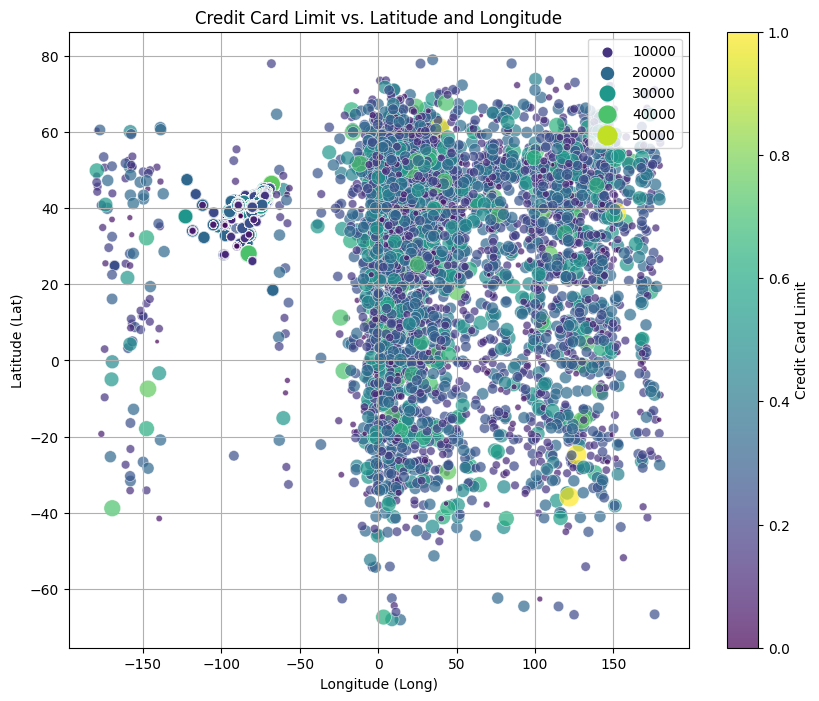

In [ ]:
# Create a scatter plot with color encoding for credit card limits
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='Long', y='Lat', hue='credit_card_limit', data=merged_df, palette='viridis', size='credit_card_limit', sizes=(10, 200), alpha=0.7)
plt.xlabel('Longitude (Long)')
plt.ylabel('Latitude (Lat)')
plt.title('Credit Card Limit vs. Latitude and Longitude')
plt.grid(True)

# Get the mappable object for creating the colorbar
mappable = scatter_plot.get_children()[0]

# Add colorbar
plt.colorbar(mappable, label='Credit Card Limit')

# Specify the location for the legend
plt.legend(loc='upper right')

plt.show()


## **HYPOTHESIS TESTING**


**Hypothesis 1: Transaction Volume and Credit Card Limit Correlation**

Null Hypothesis (H0): There is no correlation between credit card limits and transaction volumes.

Alternative Hypothesis (H1): Credit card limits and transaction volumes are positively correlated.

In [ ]:
import scipy.stats as stats

# Assuming you have already read the 'merged_df' DataFrame

# Extract the credit card limits and transaction volumes
credit_card_limits = merged_df['credit_card_limit']
transaction_volumes = merged_df['transaction_dollar_amount']

# Perform the Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(credit_card_limits, transaction_volumes)

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.6f}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant correlation.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant correlation.")


Pearson Correlation Coefficient: 0.19
P-value: 0.000000
Reject the Null Hypothesis (H0): There is a significant correlation.


**Hypothesis 2: Seasonal Spending Variation**

Null Hypothesis (H0): There is no significant seasonal variation in transaction dollar amounts.

Alternative Hypothesis (H1): Transaction dollar amounts exhibit seasonal variation over time.

In [ ]:
import scipy.stats as stats

# Assuming you have already read the 'merged_df' DataFrame and converted 'date' to datetime data type

# Extract the transaction dollar amounts and the month from the 'date' column
transaction_dollar_amounts = merged_df_cleaned['transaction_dollar_amount']
month = merged_df_cleaned['date'].dt.month

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = stats.kruskal(*[transaction_dollar_amounts[month == m] for m in range(1, 13)])

# Print the results
print(f"H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.6f}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the Null Hypothesis (H0): There is significant seasonal spending variation.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant seasonal spending variation.")


H-statistic: nan
P-value: nan
Fail to Reject the Null Hypothesis (H0): There is no significant seasonal spending variation.


**Hypothesis 3: Geographic Spending Patterns**

Null Hypothesis (H0): There is no difference in transaction dollar amounts based on geographic locations (latitude and longitude).

Alternative Hypothesis (H1): Transaction dollar amounts vary significantly based on geographic locations.

In [ ]:
import scipy.stats as stats

# Assuming you have already read the 'merged_df' DataFrame

# Extract the transaction dollar amounts and the latitude and longitude from the DataFrame
transaction_dollar_amounts = merged_df['transaction_dollar_amount']
latitude = merged_df['Lat']
longitude = merged_df['Long']

# Perform the Kruskal-Wallis test
statistic, p_value = stats.kruskal(transaction_dollar_amounts, latitude, longitude)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic:.2f}")
print(f"P-value: {p_value:.6f}")

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the Null Hypothesis (H0): Transaction dollar amounts vary significantly based on geographic locations.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant difference in transaction dollar amounts based on geographic locations.")


Kruskal-Wallis Statistic: 592587.48
P-value: 0.000000
Reject the Null Hypothesis (H0): Transaction dollar amounts vary significantly based on geographic locations.


### **TIME SERIES DATA**

In [ ]:
import pandas as pd

# Assuming you have already read the 'merged_df' DataFrame and converted 'date' to datetime data type


# Extract the hour, minute, and second from the 'date' column
merged_df['hour'] = merged_df['date'].dt.hour
merged_df['minute'] = merged_df['date'].dt.minute
merged_df['second'] = merged_df['date'].dt.second

# Create boolean features for is_weekday and is_weekend
merged_df['is_weekday'] = (merged_df['day_of_week'] < 5)  # Monday to Friday (0 to 4)
merged_df['is_weekend'] = ~merged_df['is_weekday']

# Create boolean features for is_late_night, is_morning, is_afternoon, and is_evening
merged_df['is_late_night'] = (merged_df['hour'] >= 0) & (merged_df['hour'] < 6)
merged_df['is_morning'] = (merged_df['hour'] >= 6) & (merged_df['hour'] < 12)
merged_df['is_afternoon'] = (merged_df['hour'] >= 12) & (merged_df['hour'] < 18)
merged_df['is_evening'] = (merged_df['hour'] >= 18) & (merged_df['hour'] < 24)


# Display the updated DataFrame with the new date components
merged_df.head()


date  transaction_dollar_amount       Long        Lat  \
0 2015-09-11 00:32:40                      43.78 -80.174132  40.267370   
1 2015-10-24 22:23:08                     103.15 -80.194240  40.180114   
2 2015-10-26 18:19:36                      48.55 -80.211033  40.313004   
3 2015-10-22 19:41:10                     136.18 -80.174138  40.290895   
4 2015-10-26 20:08:22                      71.82 -80.238720  40.166719   

      city state  zipcode  credit_card_limit hashed_credit_card  year  ...  \
0  Houston    PA    15342              20000           02e58935  2015  ...   
1  Houston    PA    15342              20000           02e58935  2015  ...   
2  Houston    PA    15342              20000           02e58935  2015  ...   
3  Houston    PA    15342              20000           02e58935  2015  ...   
4  Houston    PA    15342              20000           02e58935  2015  ...   

   day_of_week  hour  minute  second  is_weekday  is_weekend  is_late_night  \
0            4     0      32      40        True       False           True   
1            5    22      23       8       False        True          False   
2            0    18      19      36        True       False          False   
3            3    19      41      10        True       False          False   
4            0    20       8      22        True       False          False   

   is_morning  is_afternoon  is_evening  
0       False         False       False  
1       False         False        True  
2       False         False        True  
3       False         False        True  
4       False         False        True  

[5 rows x 23 columns]

In [ ]:
merged_df.info()